## Name- Ranjan Pratap Singh                                                      DS2307

# Census Income
## Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.	A single cell estimate of the population 16+ for each state.

2.	Controls for Hispanic Origin by age and sex.

3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


### Importing the libraries

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')


### Importing Dataset

In [90]:
df = pd.read_csv(r"C:\Users\RANJAN\Downloads\census_income.csv")

### Exploratory Data Analysis(EDA)  ----->

In [91]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Our dataset of Census Income contains 32560 rows × 15 columns . our target variable is Income and is of categorical nature so we will use classification model to test, train, predict the dataset

In [92]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


here we can see that our dataset contain two dtpyes i.e. object and float and there are  null values in our data set  we will further check later for white spaces 

In [93]:
#  checking the values counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype

here we can see that there are '?' as white space so we will turn them in to null values and do various steps to fill these 

In [94]:
df.replace(to_replace=r'^\s*\?+\s*$', value=np.nan, regex=True, inplace=True)


In [95]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [96]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [97]:
#  checking the values counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


9     10501
10   

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       30724 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      30717 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  31977 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [99]:
df[['Workclass','Occupation','Native_country']] = df[['Workclass','Occupation','Native_country']].fillna(df[['Workclass','Occupation','Native_country']].mode().iloc[0])

In [100]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


here we can see that there are no null values in the dataset

In [144]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In description we have count,mean, standard deviation(STD) , minimum(min), 25%,50%(median),75%,maximum(max)

as we can see that there is no negative value so our description of dataset is valid 

number of observations are same in all columns so there is no missing values

if we compare mean with median i.e. 50% we can see some of the data  don't have same so that all  the data is not normally distributed

if we see for outliers we can observe that some coulmn may contain outliers that we will check  later in this model

# data visualtiation--

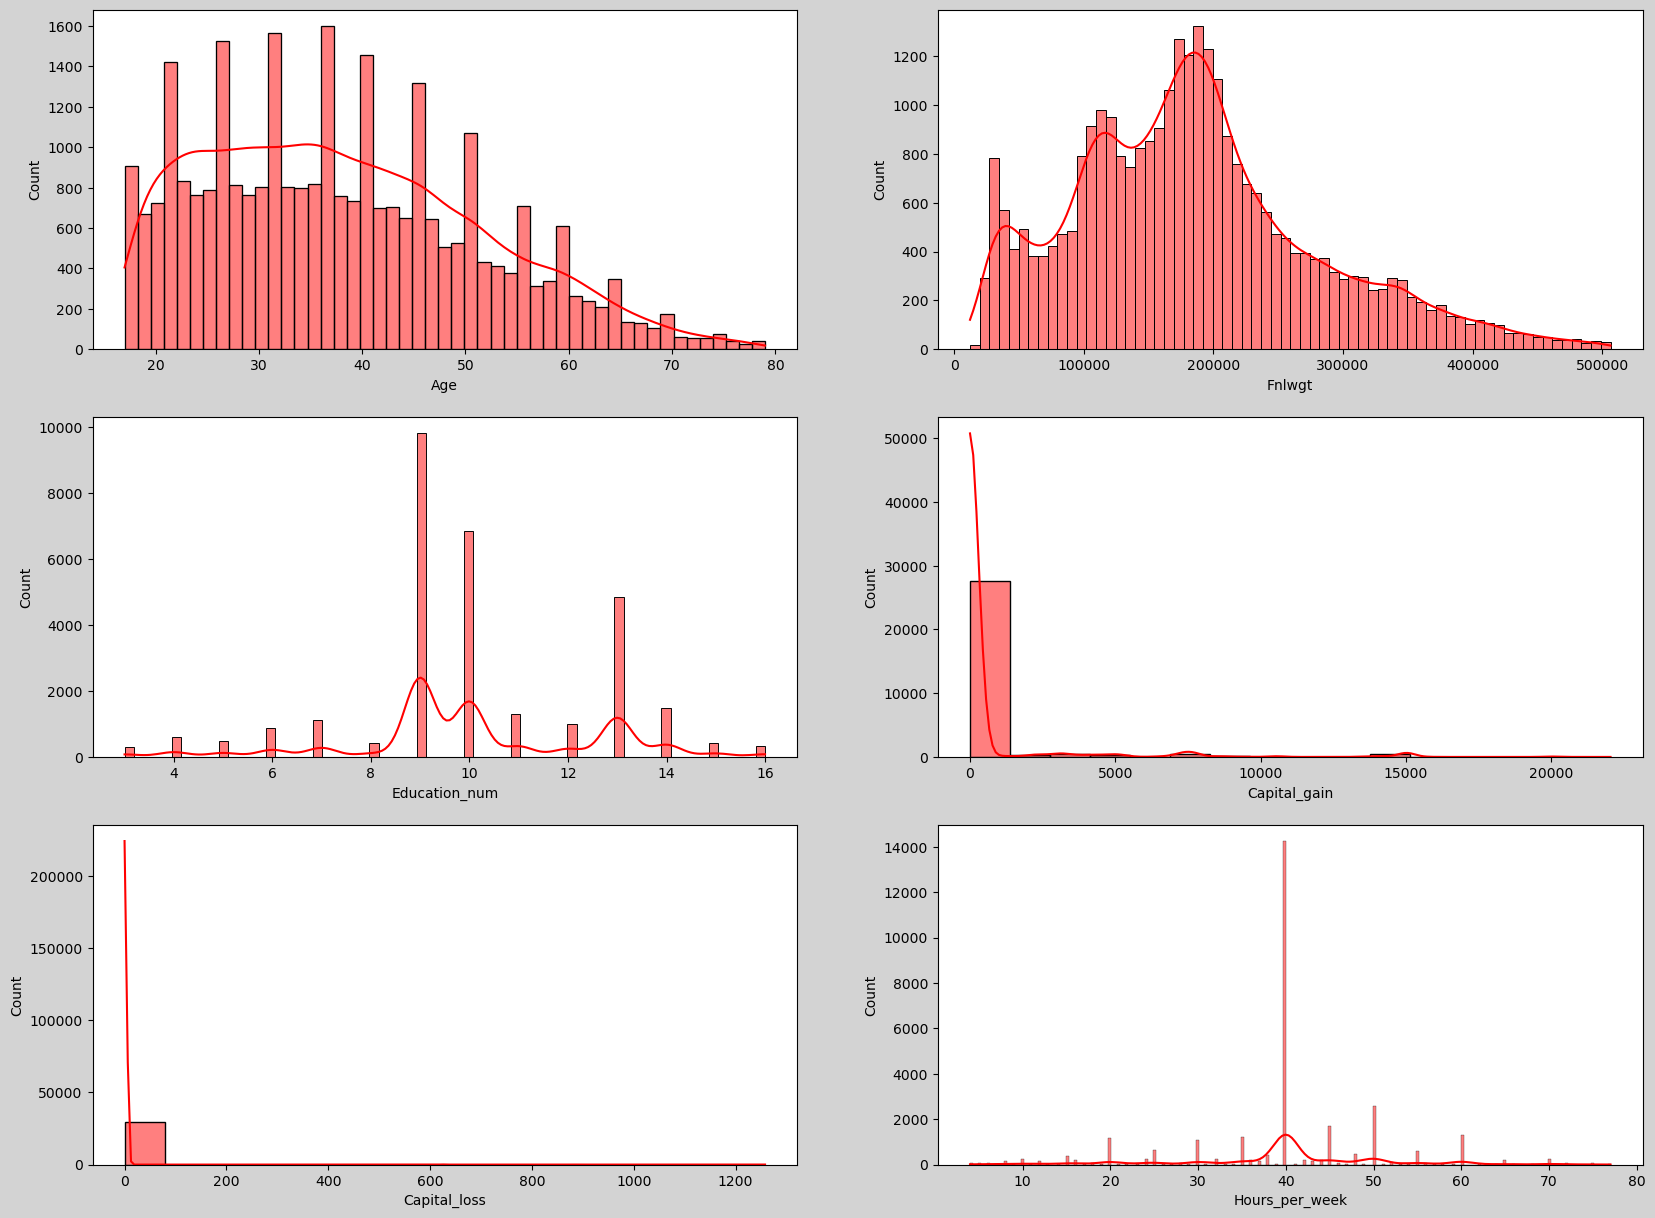

In [103]:
plt.figure(figsize=(20, 15), facecolor="lightgrey")
plotnumber = 1
for i in df1: 
    if plotnumber <= 6:
        ax = plt.subplot(3, 2, plotnumber)
        sns.histplot(x=df1[i], data=df1, kde=True, color='red')
        plt.xlabel(i)
    plotnumber += 1
plt.show()

here in the plots we can see that Capital_gain,Capital_loss are positively skewed

In [14]:
df1 = df.select_dtypes(include=['int', 'float'])

In [104]:
df2=df.select_dtypes(include=['object'])

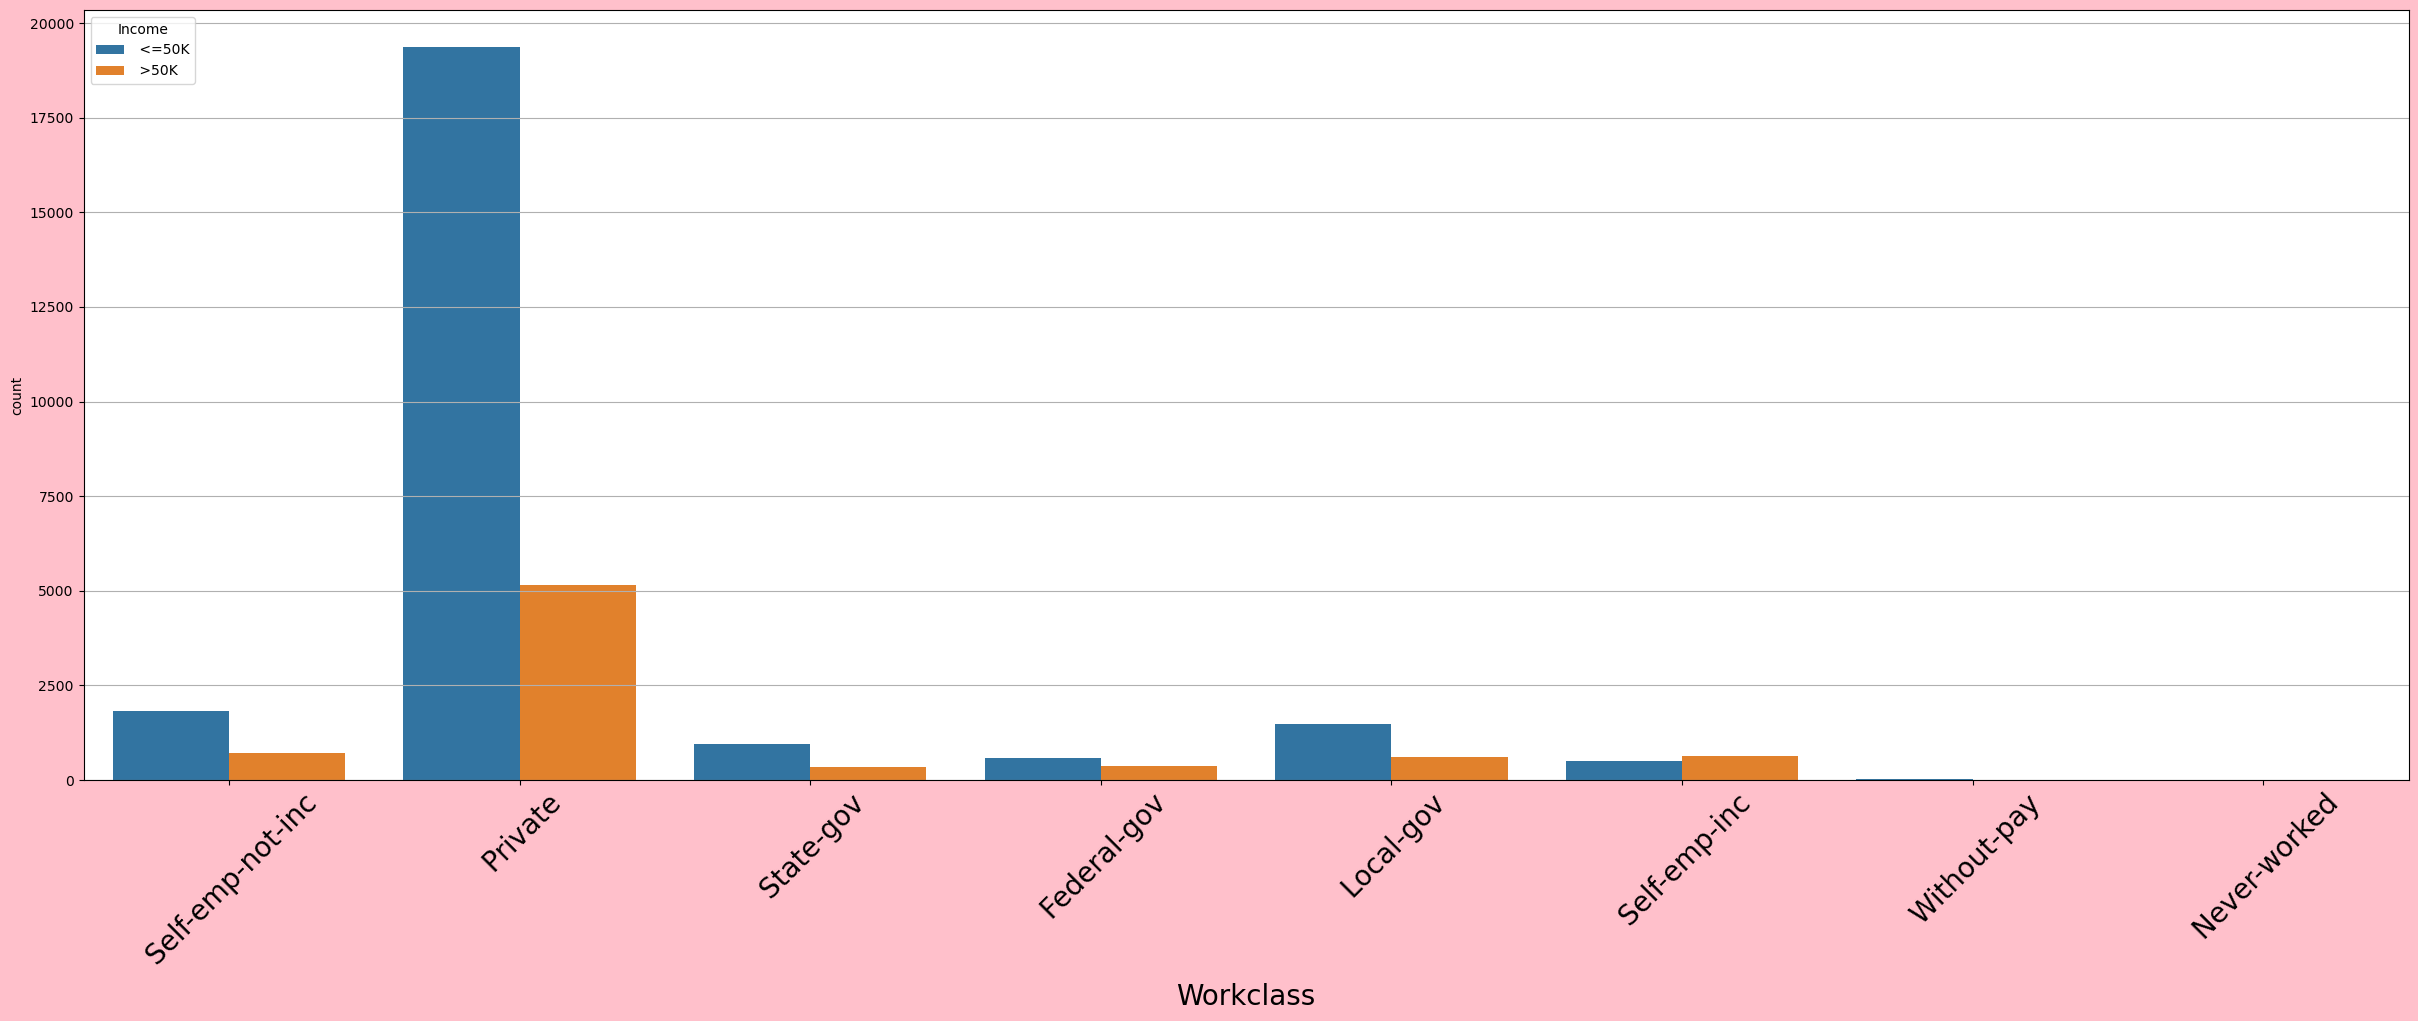

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [132]:
plt.figure(figsize=(30,10), facecolor="pink")
sns.countplot(x='Workclass' , data = df,hue='Income' )
plt.xticks(fontsize=20,rotation =45)
plt.xlabel('Workclass',fontsize=20)
plt.grid(axis ='y')
plt.show()
df['Workclass'].value_counts()

here we can see that most of the workclass is private and have salary less than 50k

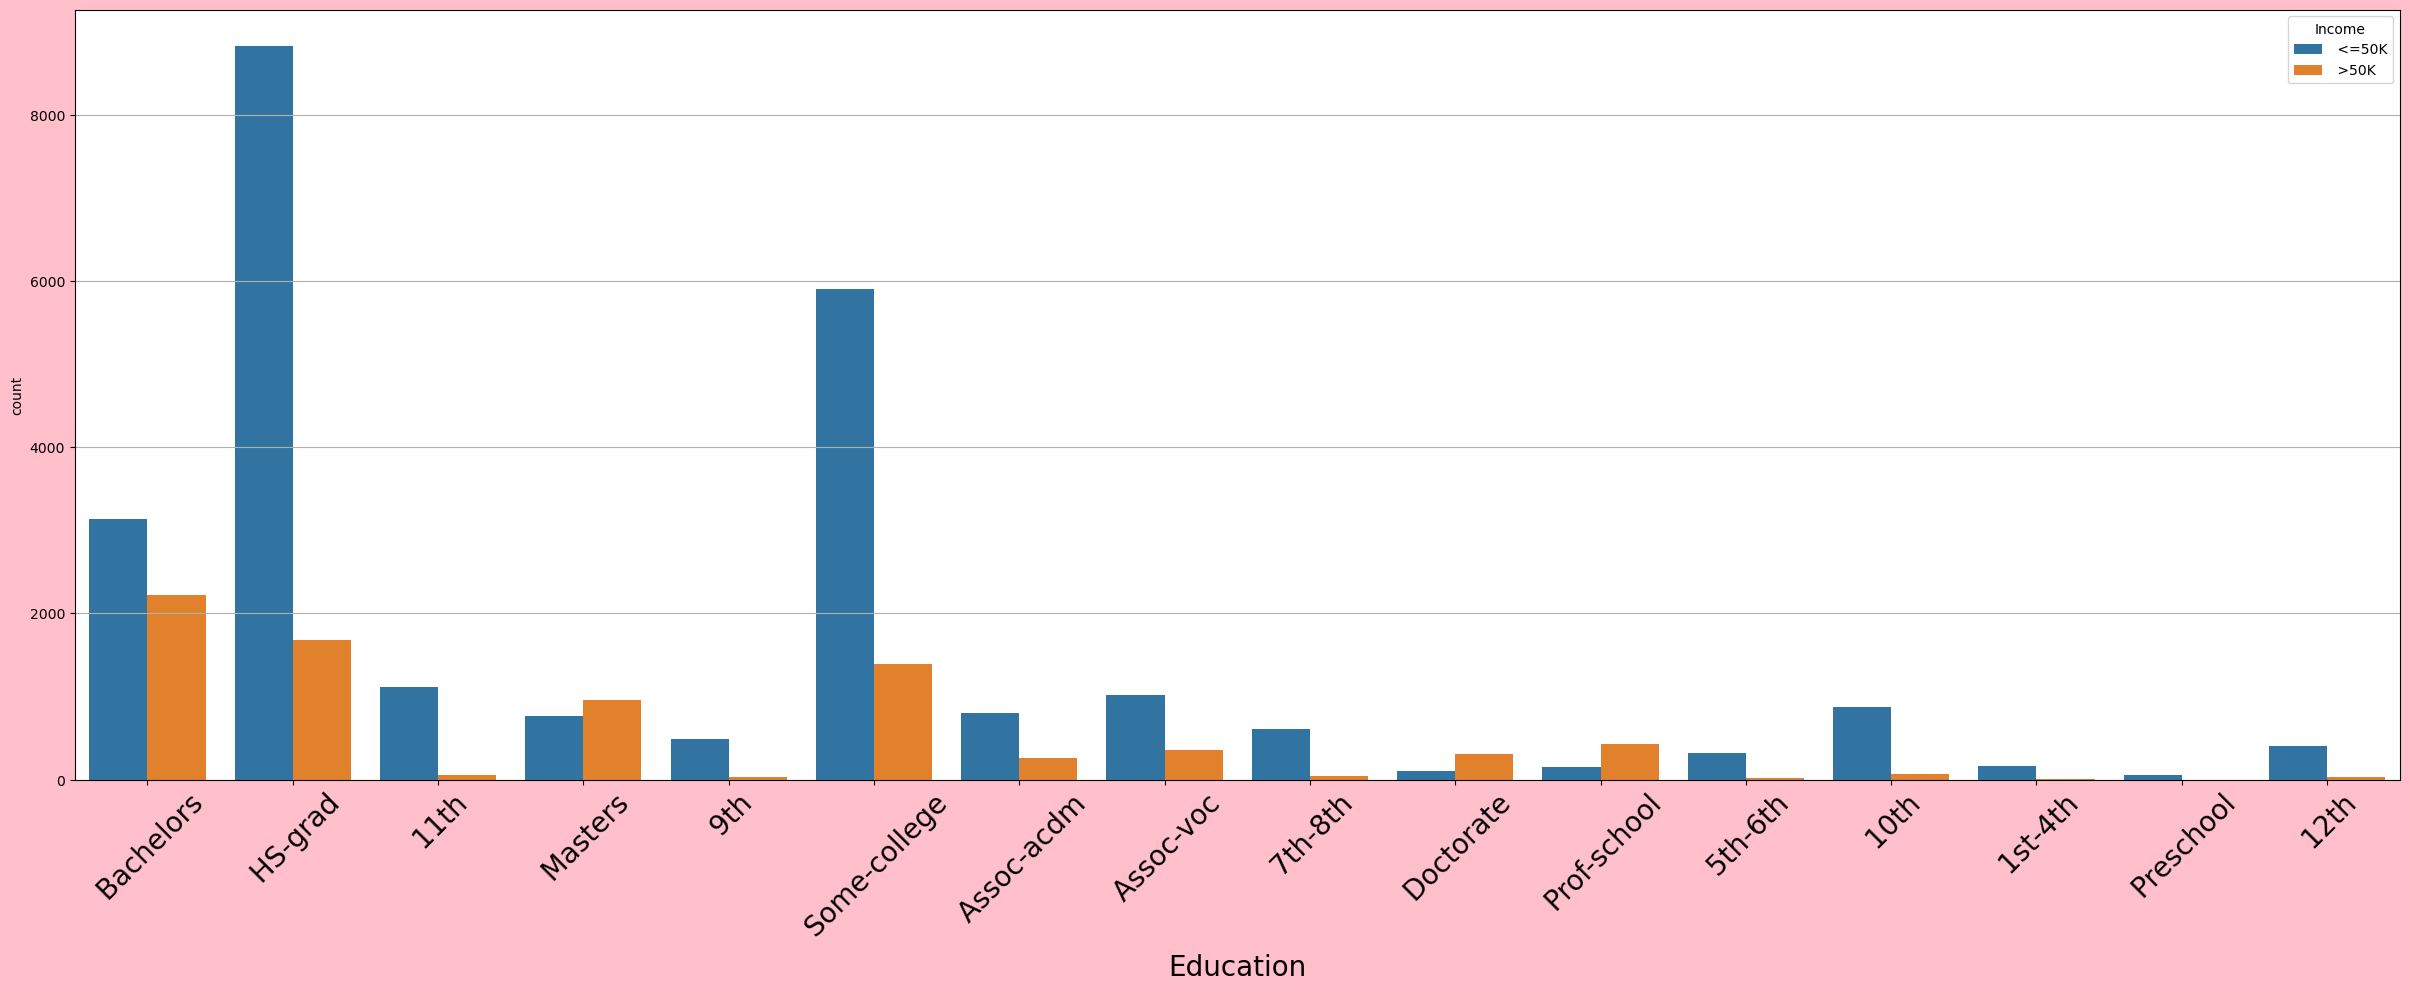

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [133]:
plt.figure(figsize=(30,10), facecolor="pink")
sns.countplot(x='Education' , data = df ,hue='Income')
plt.xticks(fontsize=20,rotation =45)
plt.xlabel('Education',fontsize=20)
plt.grid(axis ='y')
plt.show()
df['Education'].value_counts()

here we can see that most of them are Highschool-grad and bachelors have motley income more than 50k

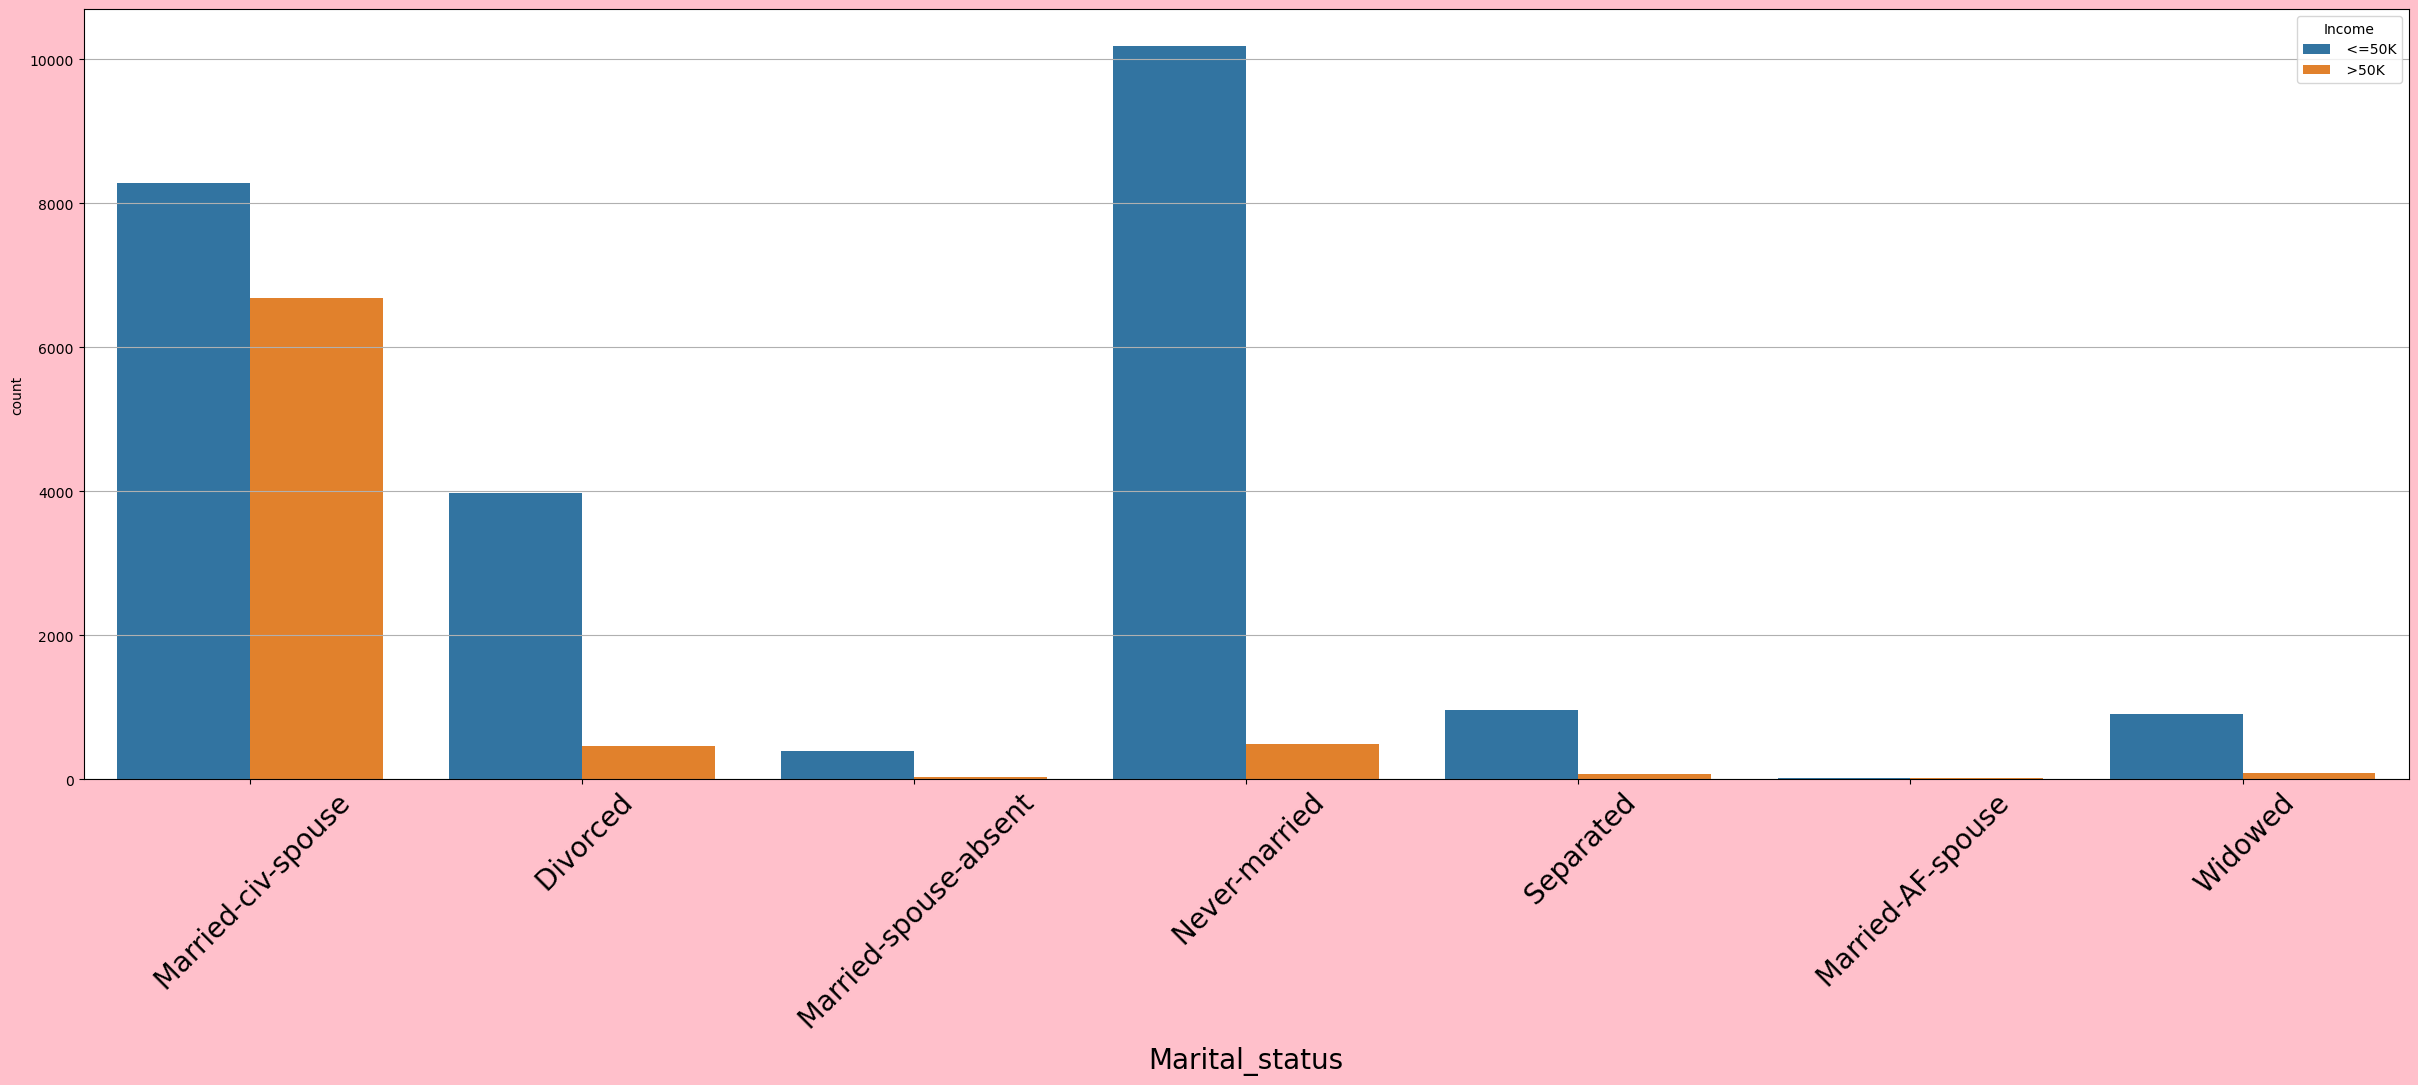

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [134]:
plt.figure(figsize=(30,10), facecolor="pink")
sns.countplot(x='Marital_status' , data = df,hue='Income' )
plt.xticks(fontsize=20,rotation =45)
plt.xlabel('Marital_status',fontsize=20)
plt.grid(axis ='y')
plt.show()
df['Marital_status'].value_counts()

here we can see the people never married are more but peole who is Married-civ-spouse have income more than 50K

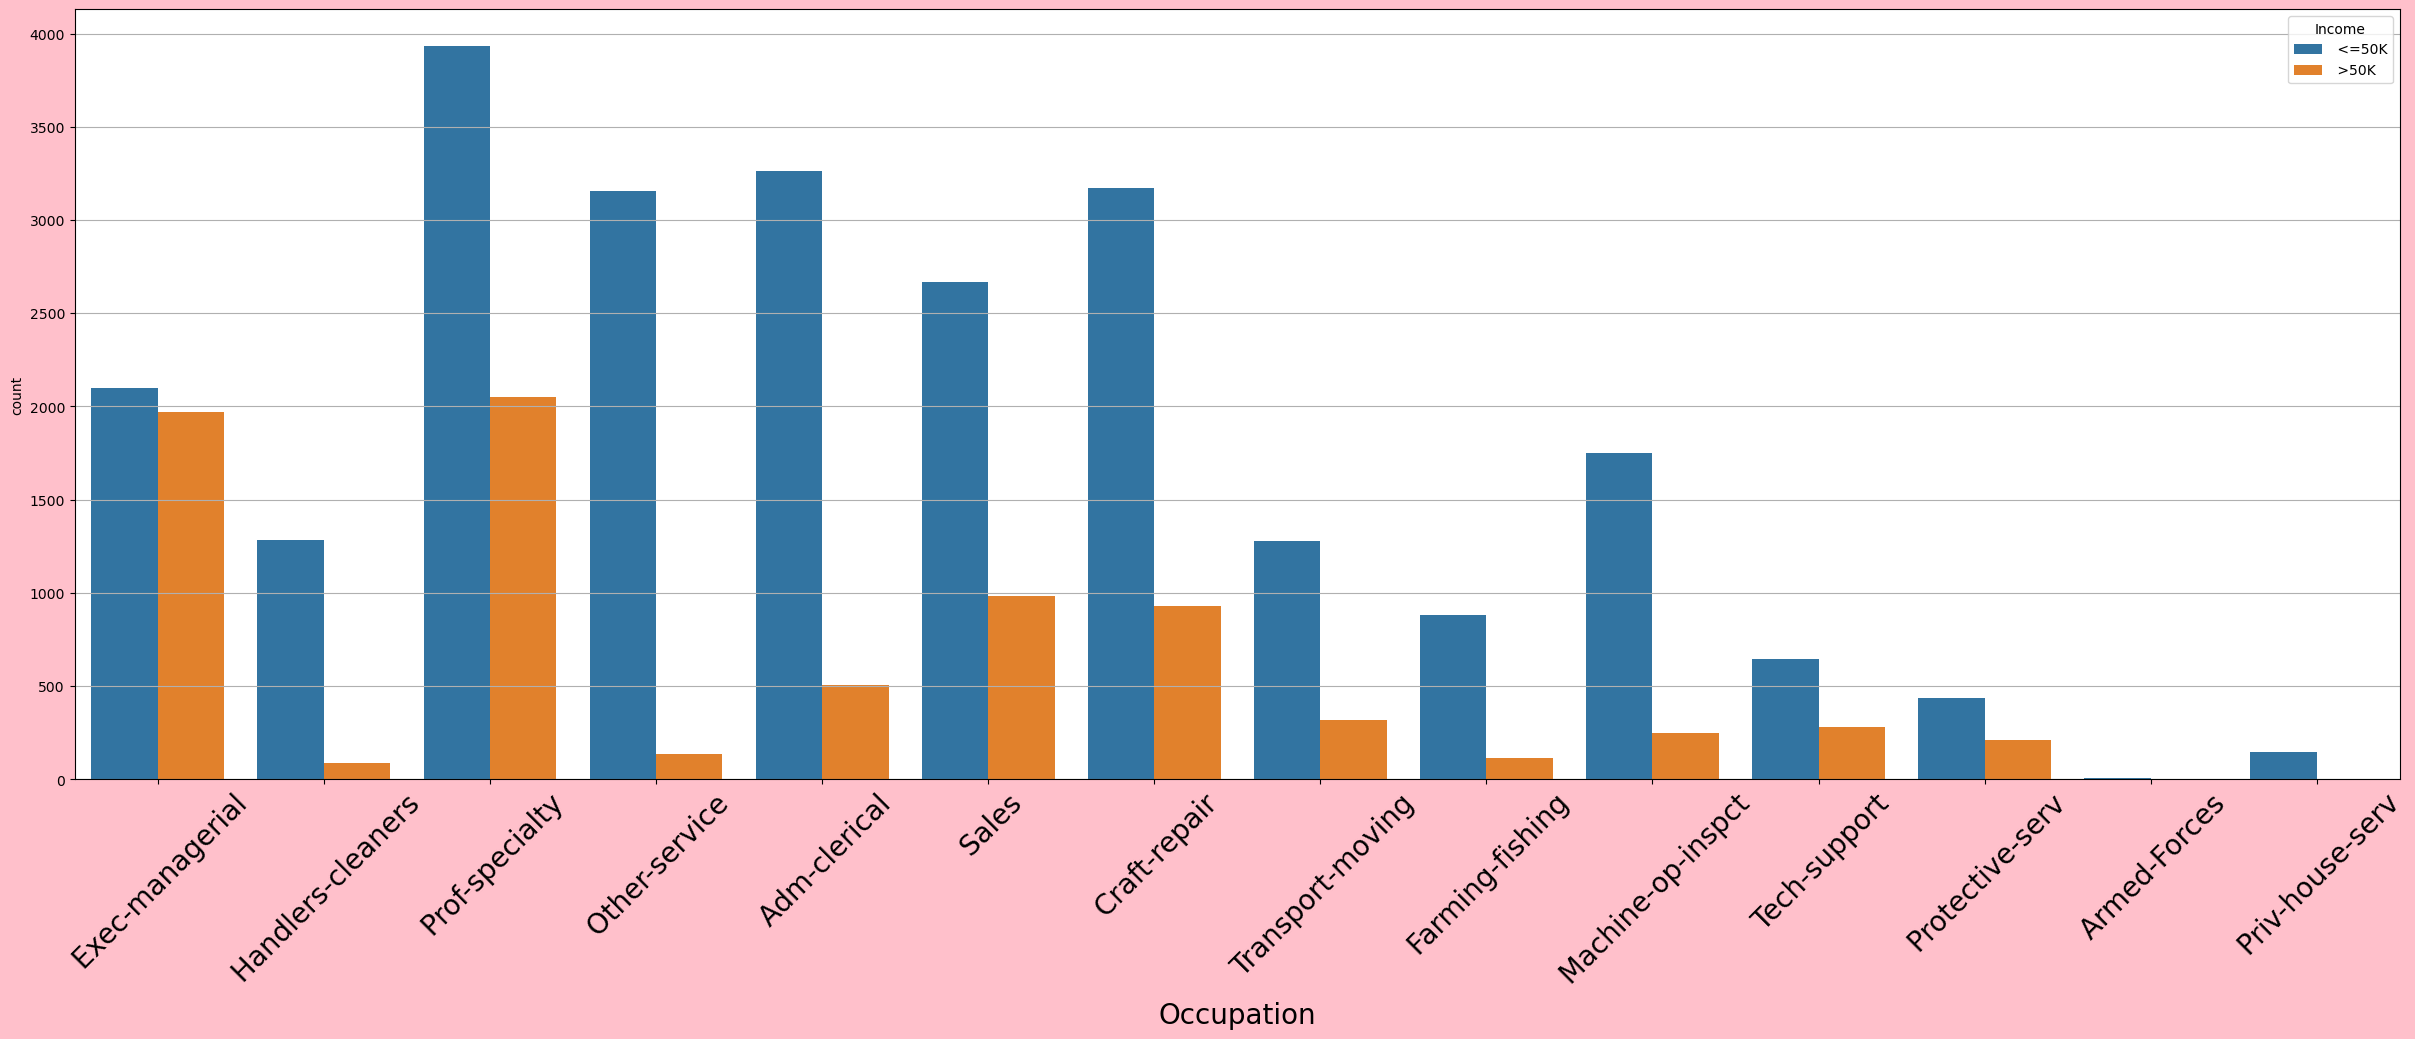

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [135]:
plt.figure(figsize=(30,10), facecolor="pink")
sns.countplot(x='Occupation' , data = df ,hue='Income')
plt.xticks(fontsize=20,rotation =45)
plt.xlabel('Occupation',fontsize=20)
plt.grid(axis ='y')
plt.show()
df['Occupation'].value_counts()

here in occupation we see msot of people are in Prof-specialty ,Craft-repair ,Exec-managerial,Adm-clerical,Sales        ,Other-service ,Machine-op-inspct,Transport-moving ,Handlers-cleaners    

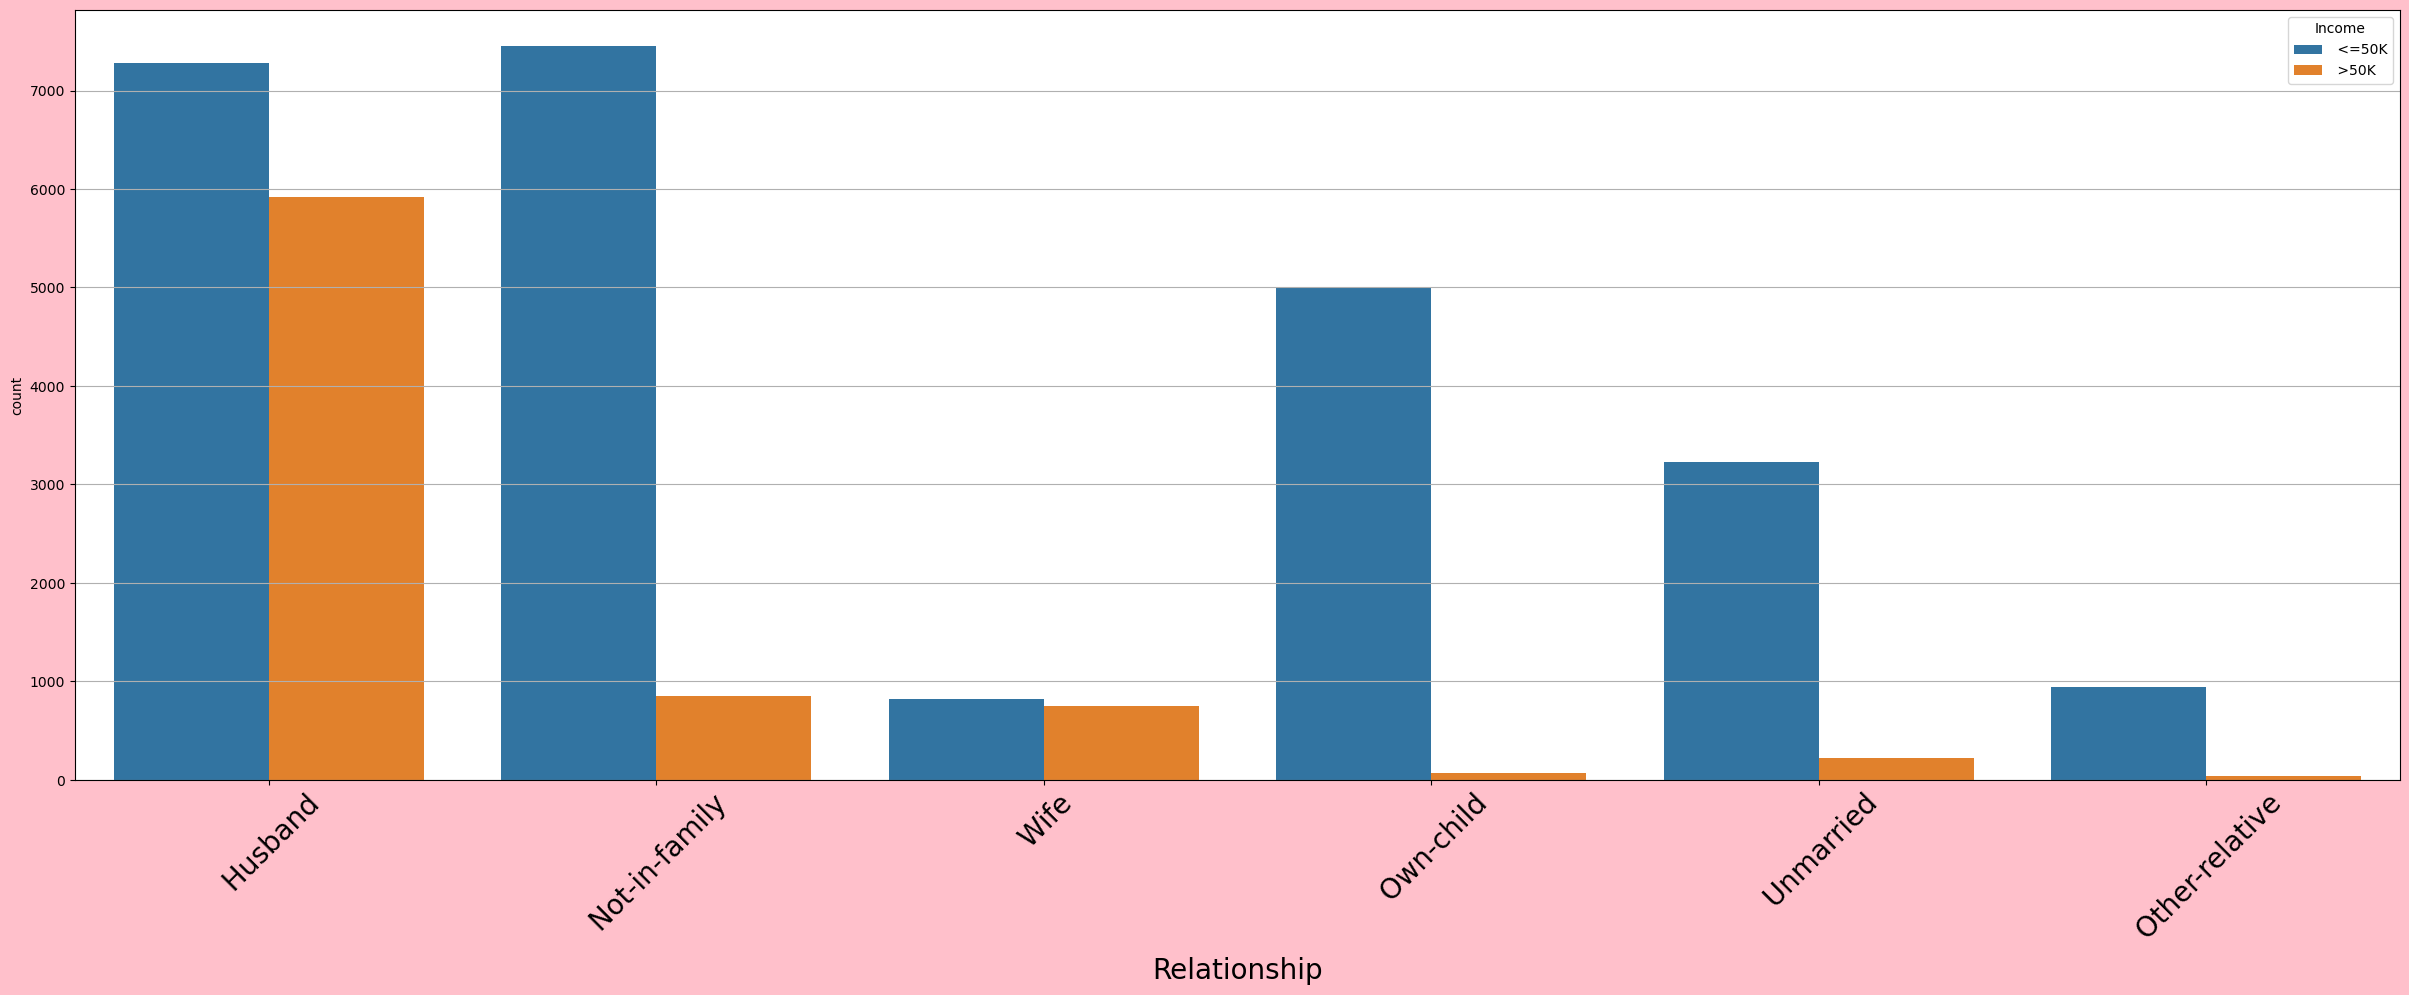

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [136]:
plt.figure(figsize=(30,10), facecolor="pink")
sns.countplot(x='Relationship' , data = df,hue='Income' )
plt.xticks(fontsize=20,rotation =45)
plt.xlabel('Relationship',fontsize=20)
plt.grid(axis ='y')
plt.show()
df['Relationship'].value_counts()

here we can ses that most of the poeple have  Husband ,Not-in-family and they also have more poeple who has income less than 50K

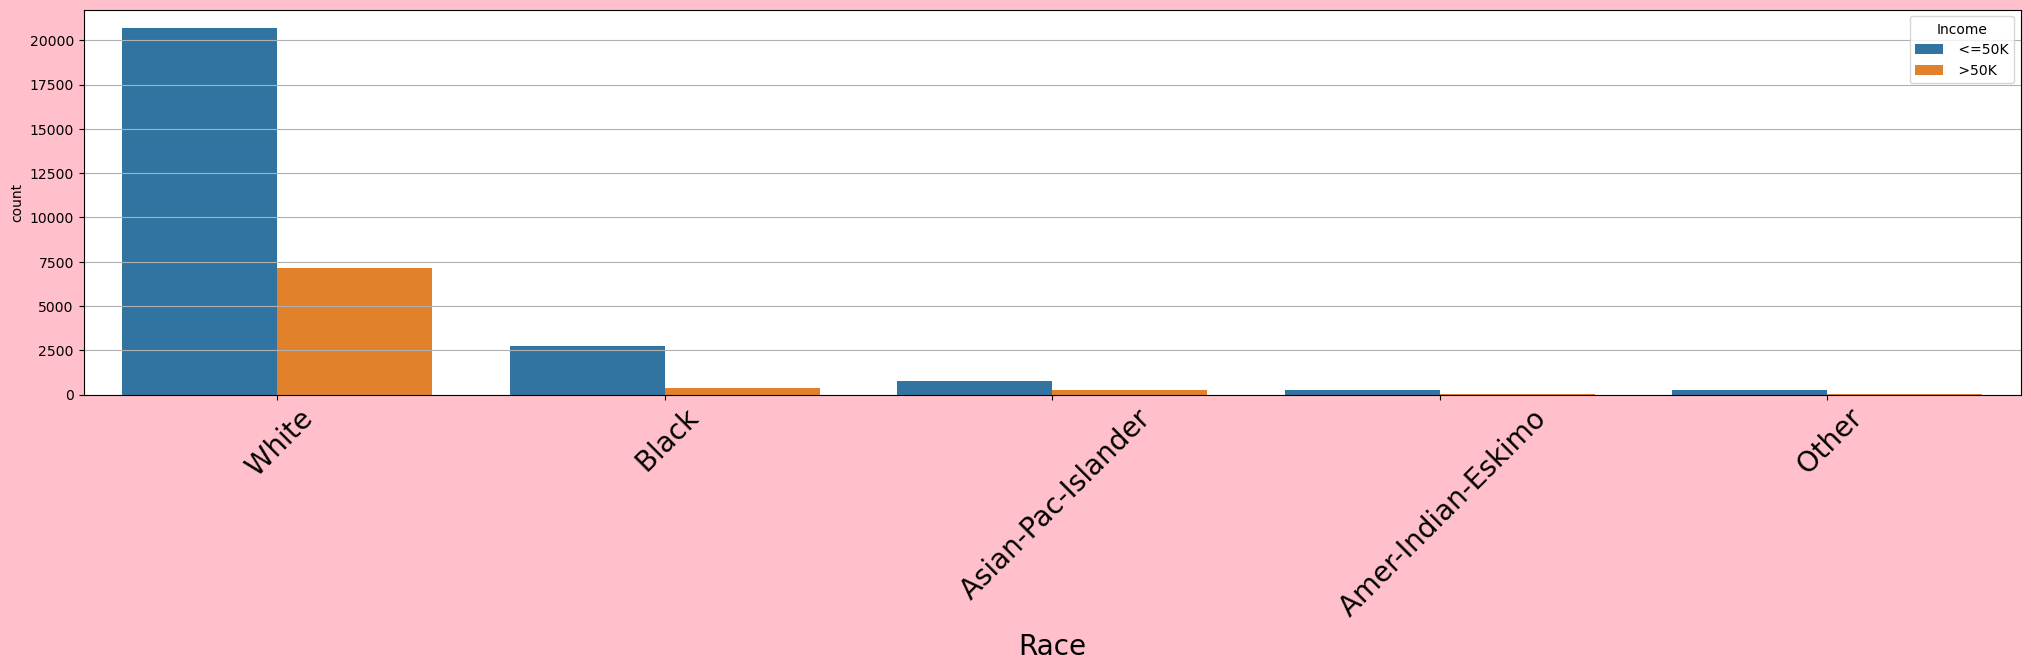

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [137]:
plt.figure(figsize=(25,5), facecolor="pink")
sns.countplot(x='Race' , data = df ,hue='Income')
plt.xticks(fontsize=20,rotation =45)
plt.xlabel('Race',fontsize=20)
plt.grid(axis ='y')
plt.show()
df['Race'].value_counts()

here we can see that most people are white and have both more than others

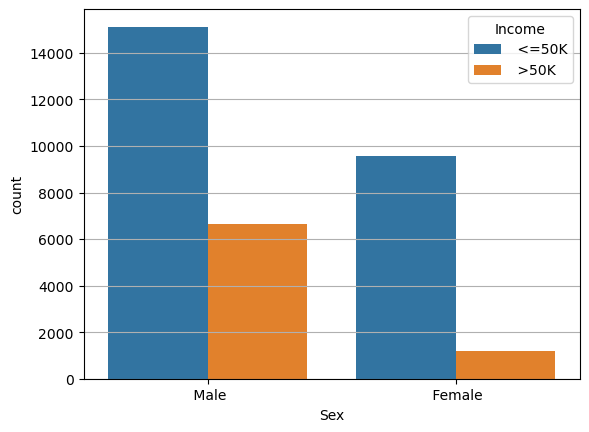

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [138]:
sns.countplot(x='Sex' , data = df ,hue='Income')
plt.grid(axis ='y')
plt.show()
df['Sex'].value_counts()

herer most of the people are male and they have comparitively more people that have salary more than 50k 

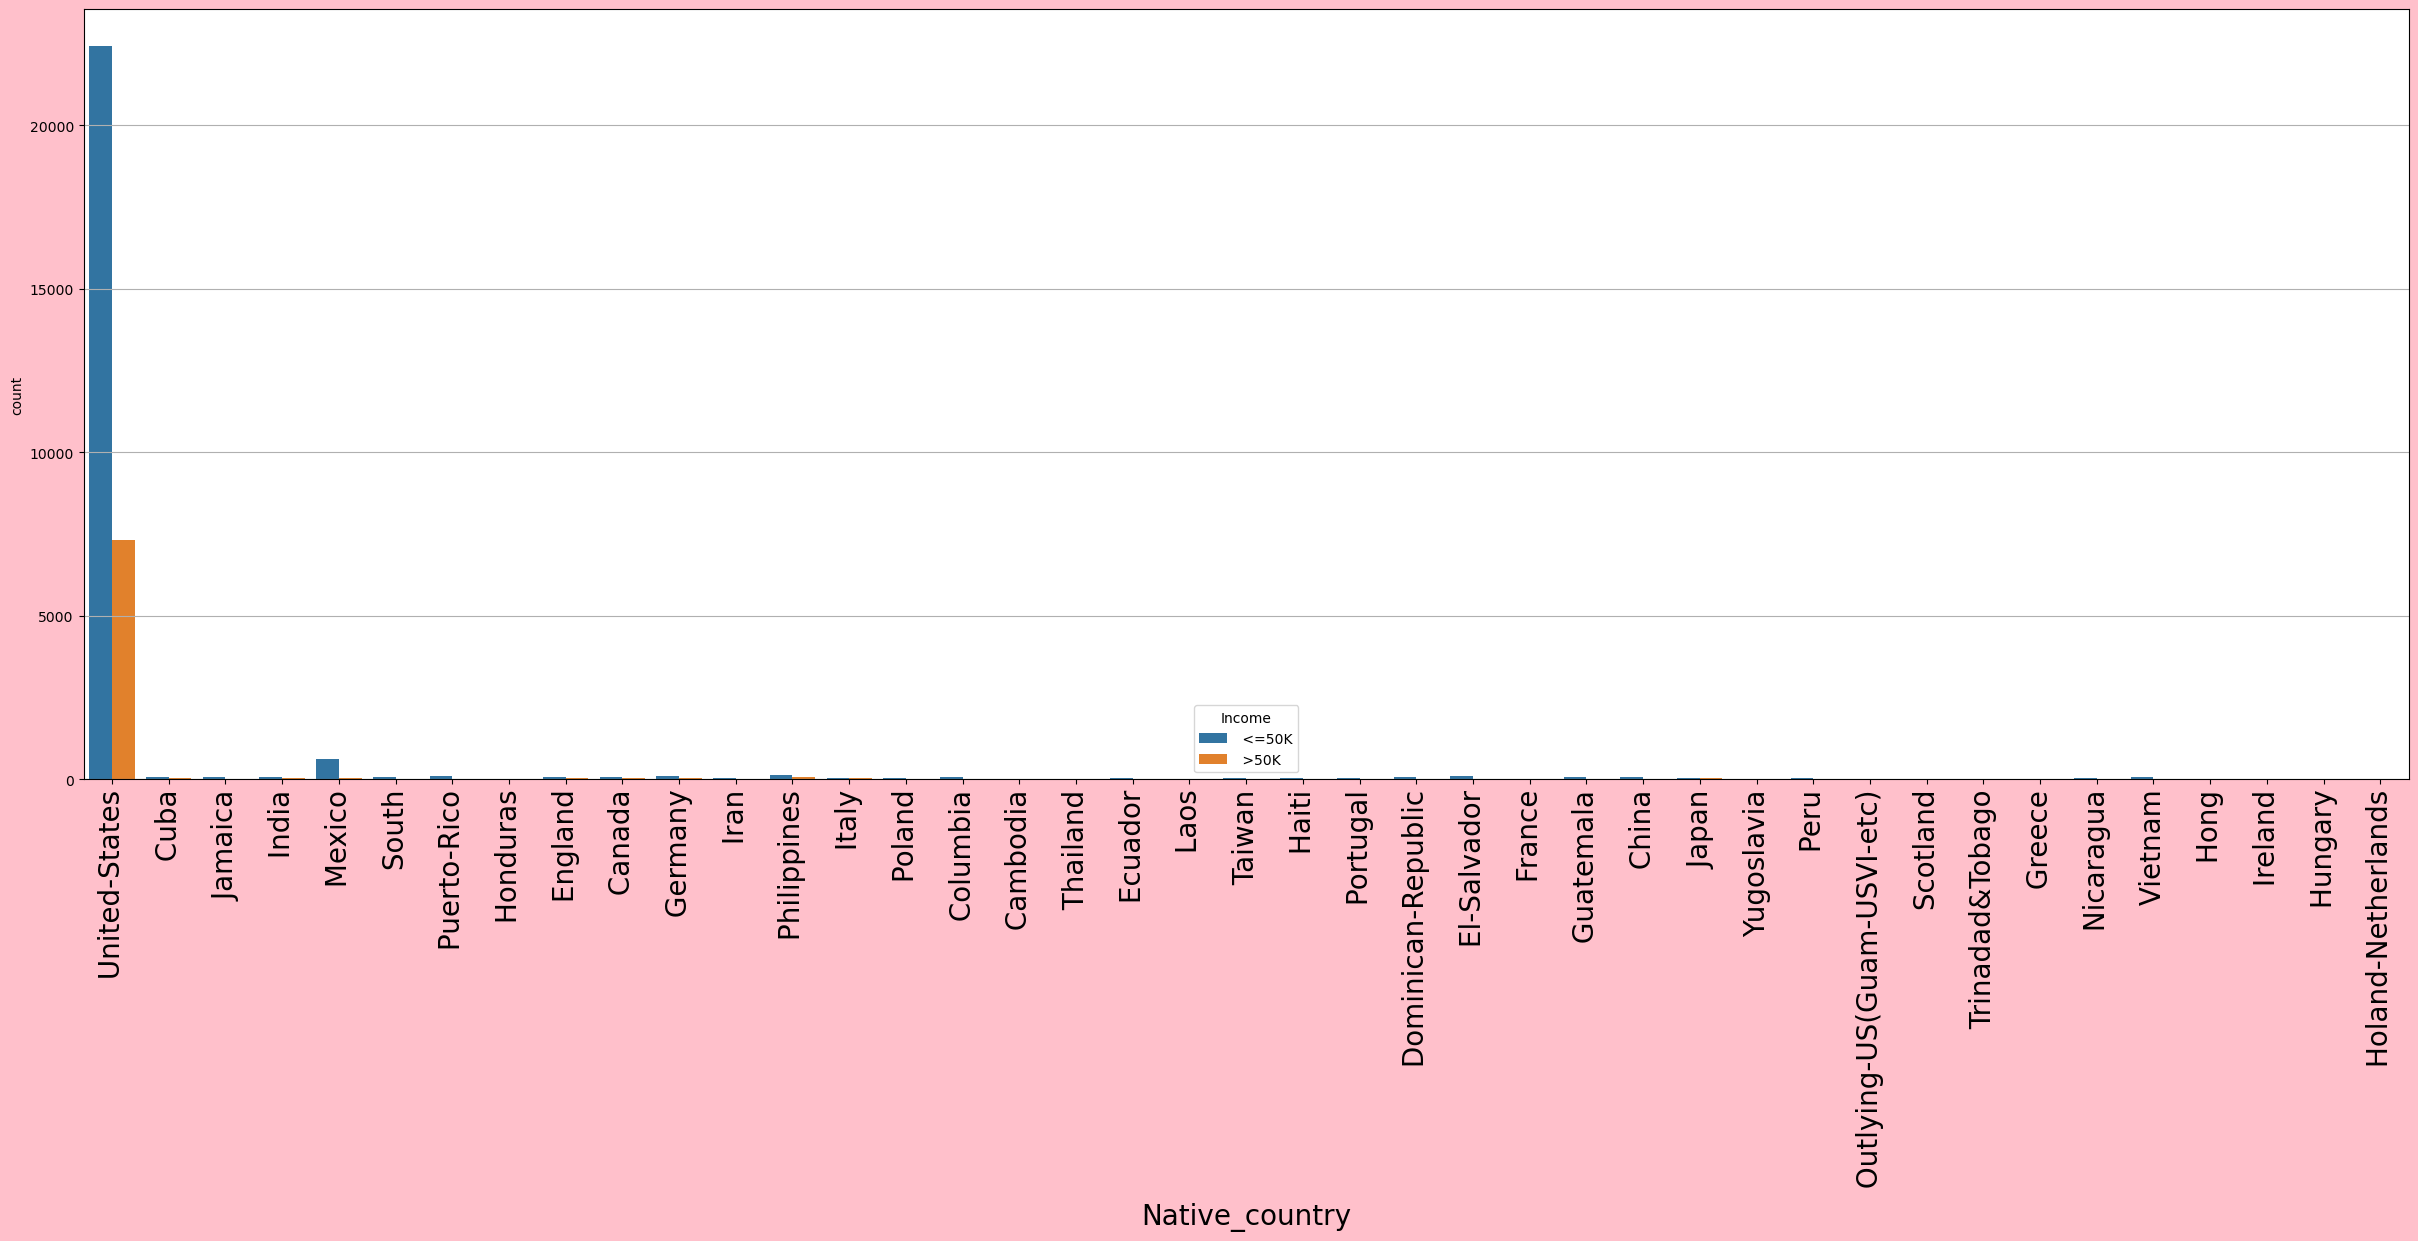

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [139]:
plt.figure(figsize=(30,10), facecolor="pink")
sns.countplot(x='Native_country' , data = df,hue='Income' )
plt.xticks(fontsize=20,rotation =90)
plt.xlabel('Native_country',fontsize=20)
plt.grid(axis ='y')
plt.show()
df['Native_country'].value_counts()

here we see that most have native country as USA

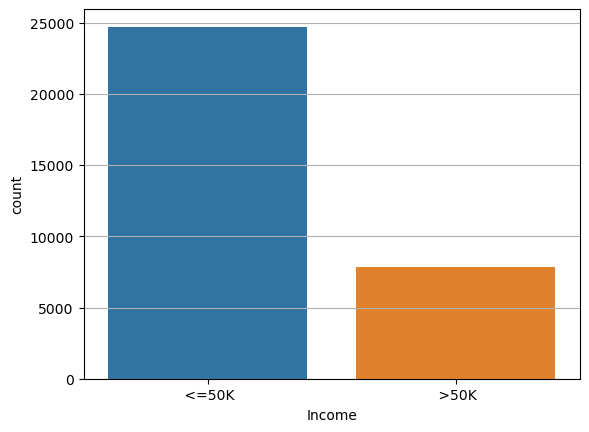

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [141]:
sns.countplot(x='Income' , data = df )
plt.grid(axis ='y')
plt.show()
df['Income'].value_counts()

here we see that  more people have income that is less than 50K 

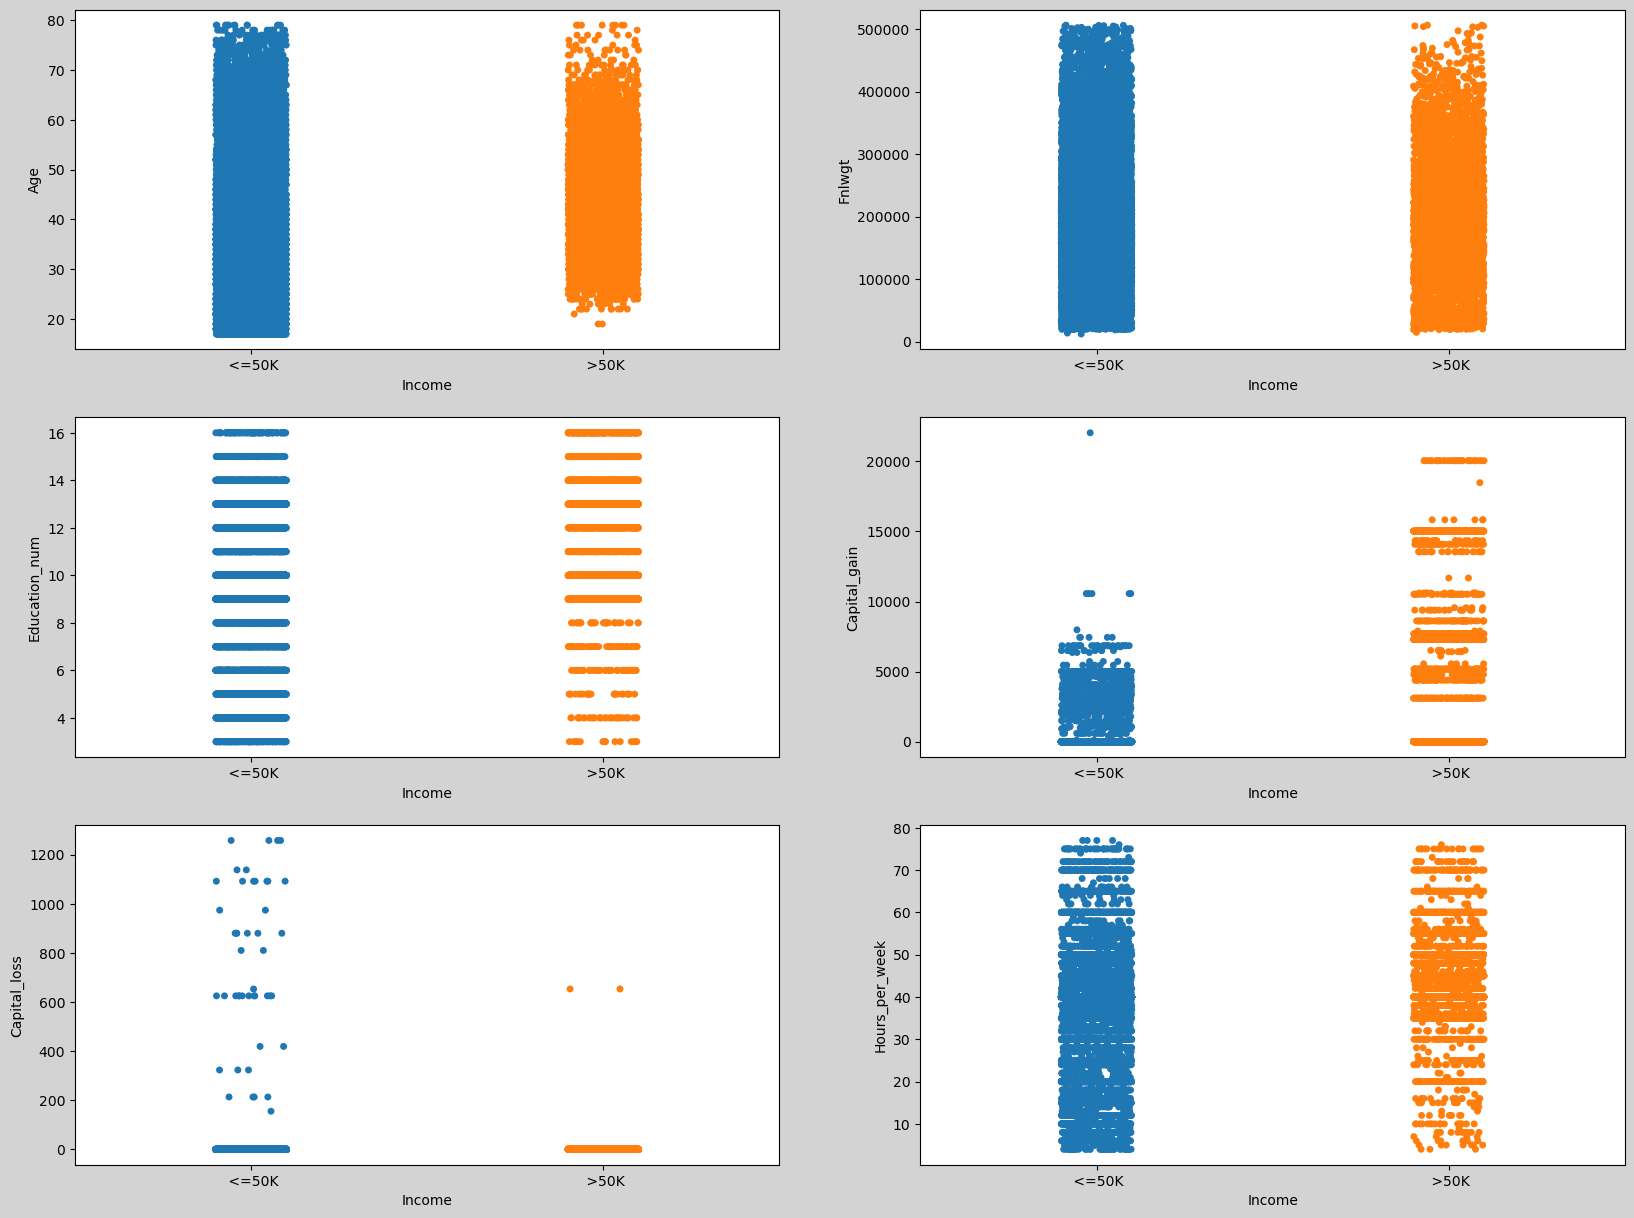

In [148]:
plt.figure(figsize=(20, 15), facecolor="lightgrey")
plotnumber = 1
for i in df1: 
    if plotnumber <= 6:
        ax = plt.subplot(3, 2, plotnumber)
        sns.stripplot(y=df1[i], x=df['Income'], data=df1)
        plt.ylabel(i)
    plotnumber += 1
plt.show()

here in graphs we can see that most of the people that have more capital gain has income more than 50K and  if they are in capital_loss then  more have capital loss whose income is less than 50K 

<function matplotlib.pyplot.show(close=None, block=None)>

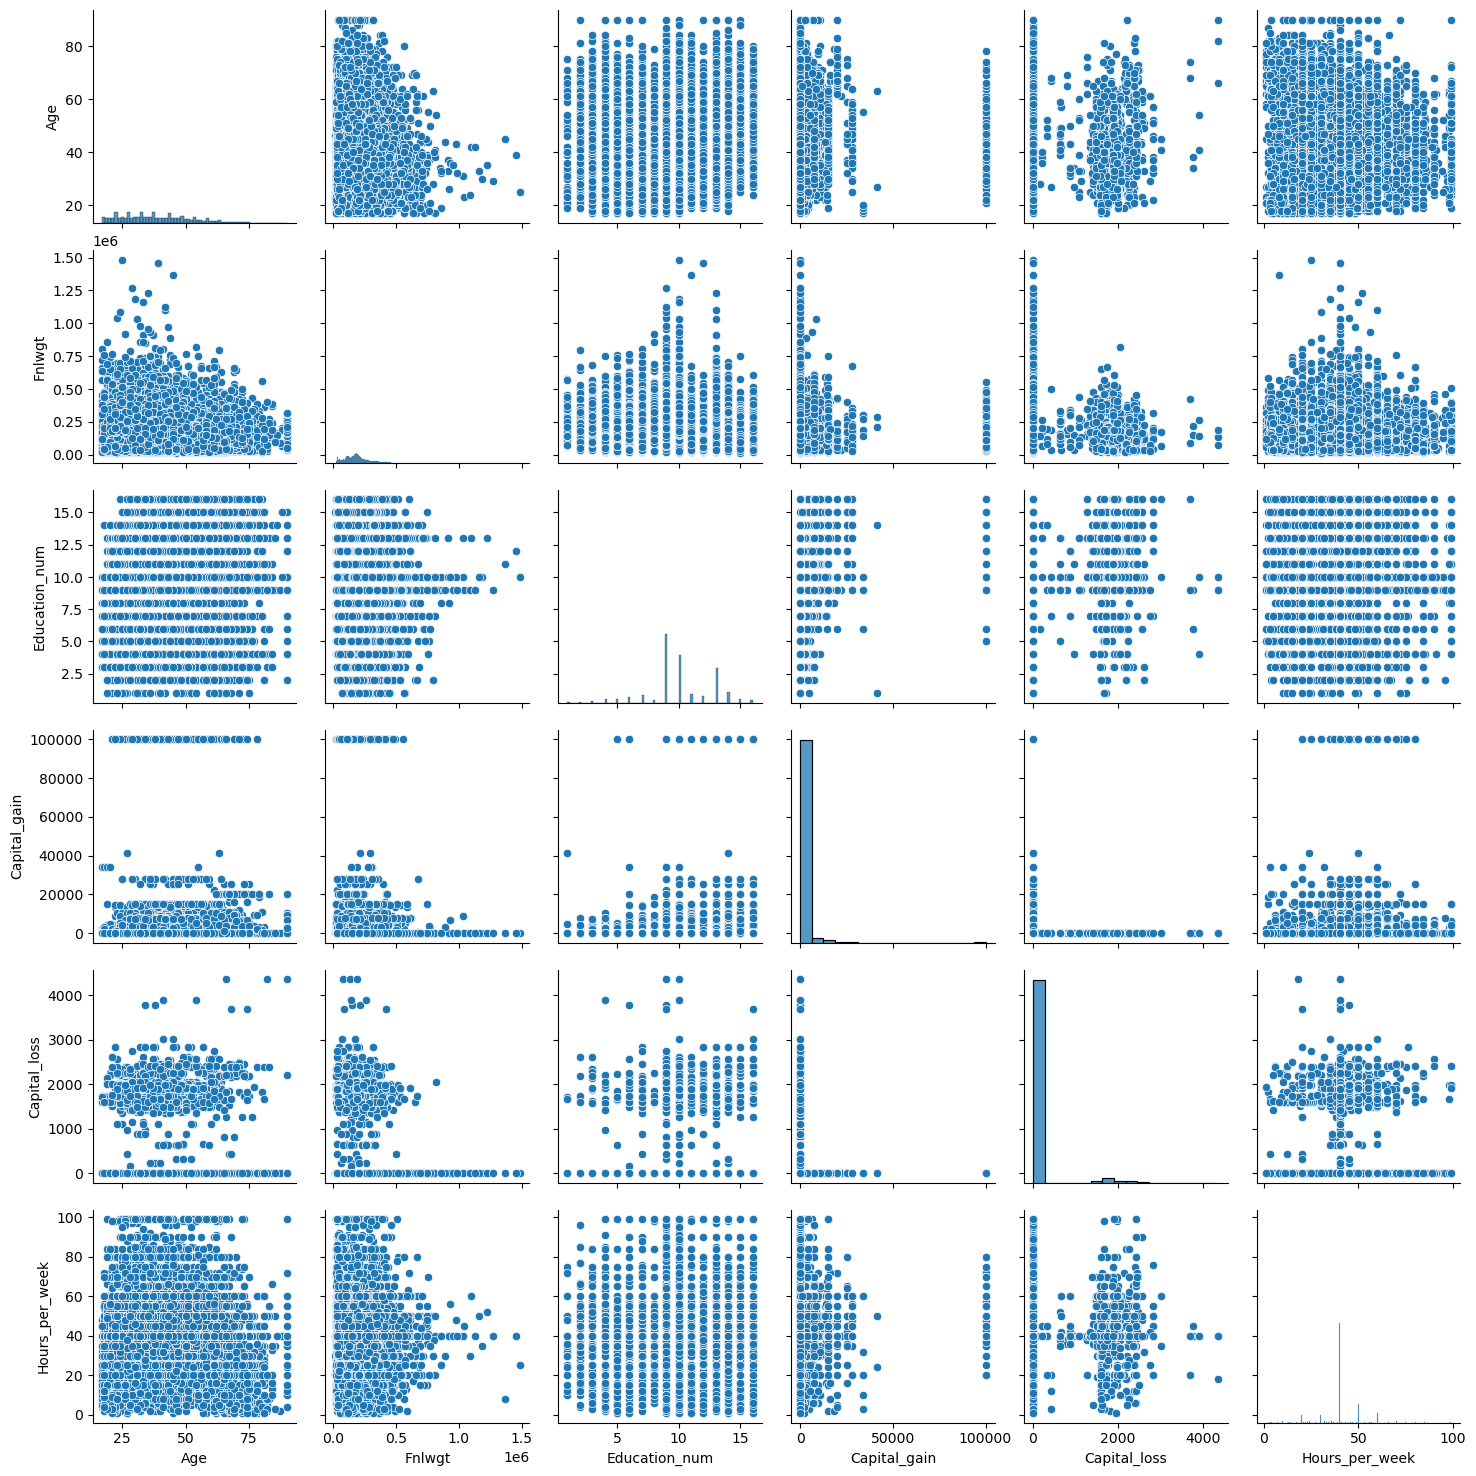

In [142]:
sns.pairplot(data = df)
plt.show

## checking for outliers

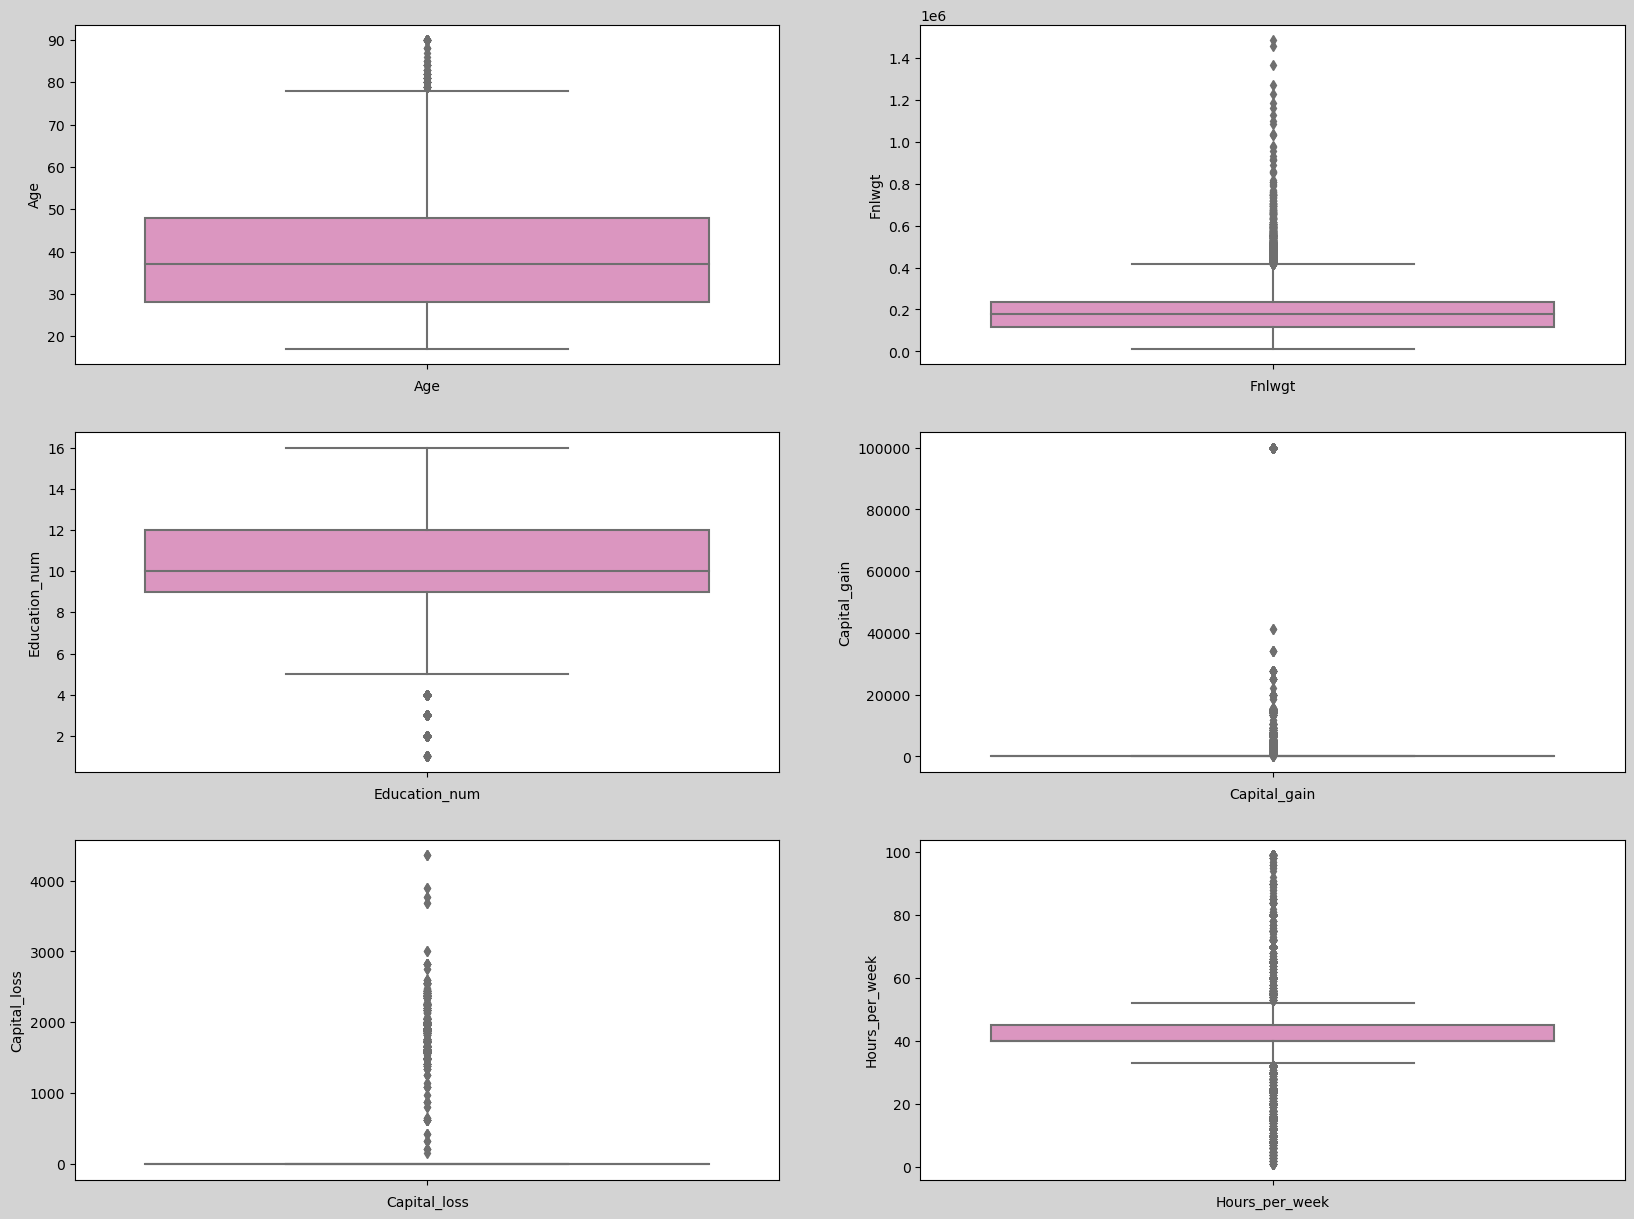

In [16]:
plt.figure(figsize=(20, 15), facecolor="lightgrey")
plotnumber = 1
for i in df1: 
    if plotnumber <= 6:
        ax = plt.subplot(3, 2, plotnumber)
        sns.boxplot( y = df1[i] , palette = 'Set2_r')
        plt.xlabel(i)
    plotnumber += 1
plt.show()

here we can see that there are outliers present in the data  all the features and we will remove the outliers

In [17]:
from scipy.stats import zscore
z = np.abs(zscore(df1))
z

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,0.837097,1.008742,1.134779,0.145914,0.216663,2.222120
1,0.042640,0.245046,0.420027,0.145914,0.216663,0.035430
2,1.057031,0.425770,1.197429,0.145914,0.216663,0.035430
3,0.775755,1.408146,1.134779,0.145914,0.216663,0.035430
4,0.115952,0.898170,1.523480,0.145914,0.216663,0.035430
...,...,...,...,...,...,...
32555,0.849066,0.639710,0.746077,0.145914,0.216663,0.197407
32556,0.103982,0.335466,0.420027,0.145914,0.216663,0.035430
32557,1.423589,0.358811,0.420027,0.145914,0.216663,0.035430
32558,1.215624,0.110927,0.420027,0.145914,0.216663,1.655200


In [18]:
np.where(z>3)

(array([    9,    22,    27, ..., 32524, 32524, 32530], dtype=int64),
 array([5, 4, 5, ..., 0, 5, 5], dtype=int64))

In [19]:
df2= df[(z<3).all(axis=1)]

In [20]:
print('percentage of dataloss',((df.shape[0]-df2.shape[0])/df.shape[0])*100)

percentage of dataloss 8.393734643734643


In [21]:
df=df2

In [22]:
df1 = df.select_dtypes(include=['int', 'float'])

here we removed the outliers

### -- Checking for Skewness

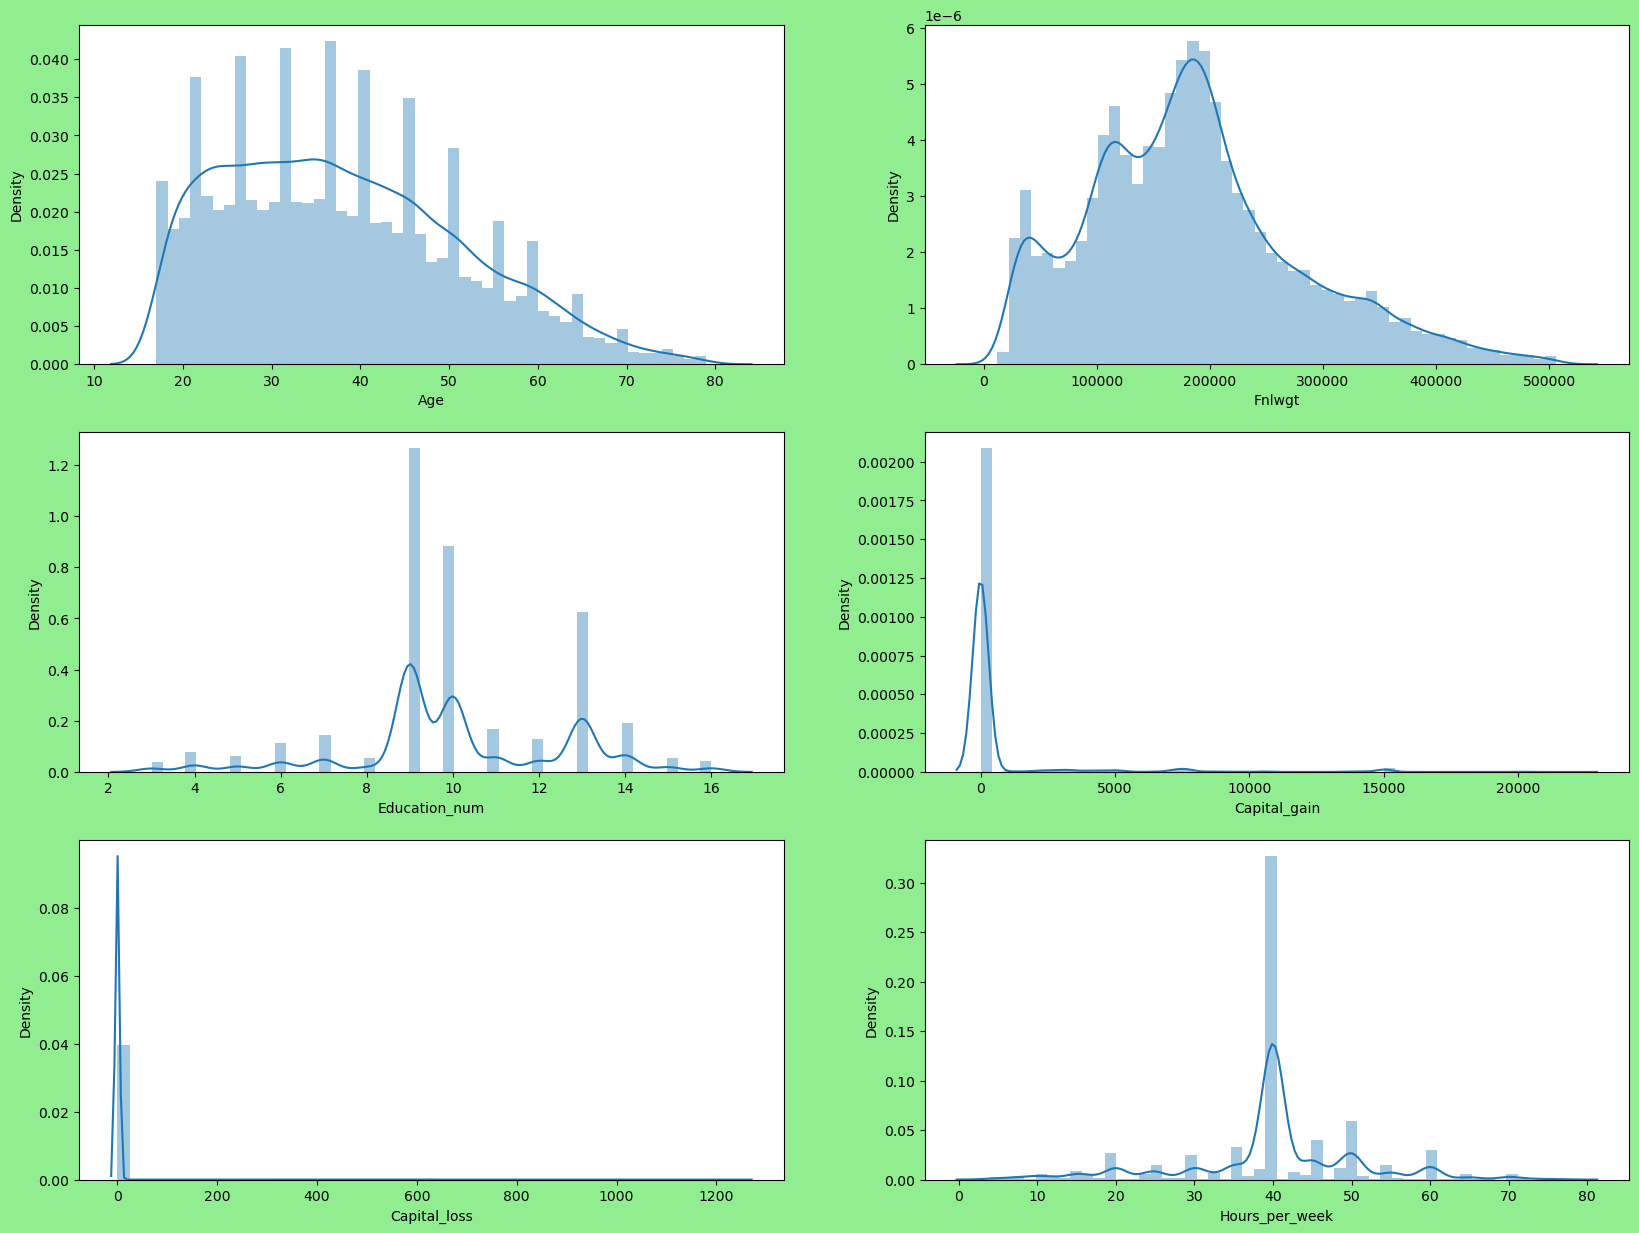

In [23]:
plt.figure(figsize=(20, 15), facecolor="lightgreen")
plotnumber = 1
for i in df1: 
    if plotnumber <= 6:
        ax = plt.subplot(3, 2, plotnumber)
        sns.distplot(df1[i] )
        plt.xlabel(i)
    plotnumber += 1
plt.show()

In [25]:
df.skew()

Age                0.491112
Fnlwgt             0.634168
Education_num     -0.170298
Capital_gain       4.943642
Capital_loss      29.661241
Hours_per_week    -0.354170
dtype: float64

here we can see that some of the features are higly positively  skewed so we will remove the skewness

In [26]:
small_constant = 0.001
df['Capital_gain'] = np.log(df['Capital_gain'] + small_constant)
df['Capital_loss']= np.log(df['Capital_loss'] + small_constant)


In [28]:
df.skew()

Age                0.491112
Fnlwgt             0.634168
Education_num     -0.170298
Capital_gain       3.087772
Capital_loss      24.928257
Hours_per_week    -0.354170
dtype: float64

In [29]:
df.skew()

Age                0.491112
Fnlwgt             0.634168
Education_num     -0.170298
Capital_gain       3.087772
Capital_loss      24.928257
Hours_per_week    -0.354170
dtype: float64

In [30]:
df['Capital_loss'] = np.cbrt(df['Capital_loss'] + small_constant)


df.skew()

here we can see there is still skewness but if we use more methods we get null values in features as Capital_gain , Capital_loss contains too many 0 so we will continue with this much skewness

### checking for correlation 

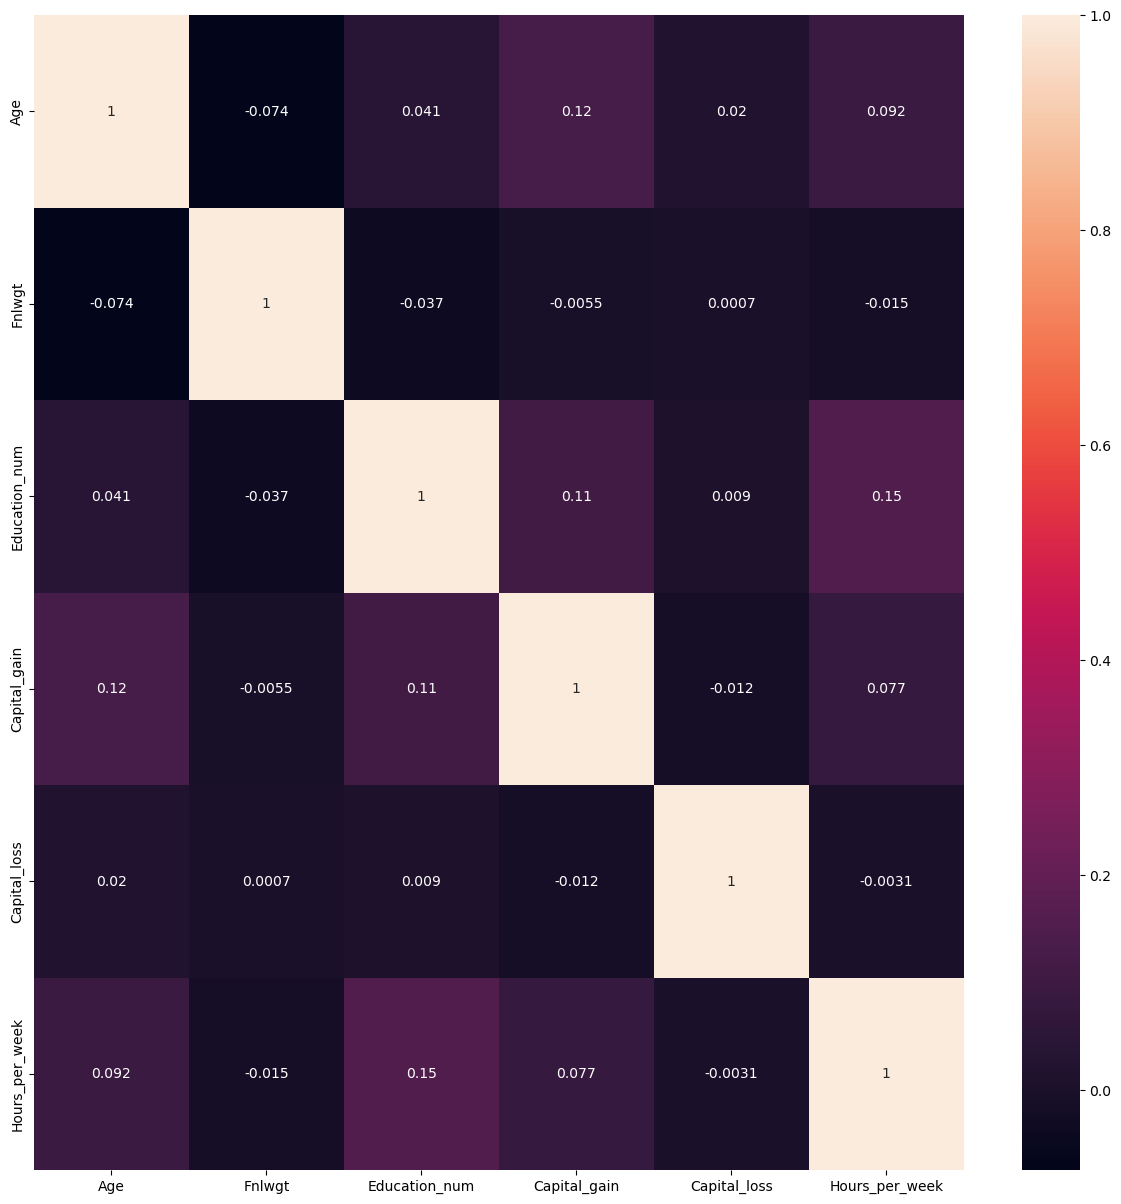

In [33]:
correlation = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation , annot = True)
plt.show()

here we can see that there is no significany high correaltion within the featues we will later check in the analysis

### using label encoder

In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])


### Seperating features and target variable

In [36]:
X=  df.drop(['Income'], axis = 1)
Y=df['Income'] 

### Scaling using Standard Scalar

In [38]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = pd.DataFrame(SS.fit_transform(X), columns = X.columns)
X

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.887615,1.733034,-1.077638,-0.340349,1.191339,-0.410521,-0.780317,-0.919032,0.393963,0.716230,-0.296304,-0.040144,-2.414481,0.257289
1,-0.010760,-0.078214,0.322068,0.249294,-0.439450,-1.731049,-0.278651,-0.297840,0.393963,0.716230,-0.296304,-0.040144,0.009327,0.257289
2,1.112209,-0.078214,0.523824,-2.404103,-1.254844,-0.410521,-0.278651,-0.919032,-1.957360,0.716230,-0.296304,-0.040144,0.009327,0.257289
3,-0.759406,-0.078214,1.620531,-0.340349,1.191339,-0.410521,0.724679,2.186928,-1.957360,-1.396199,-0.296304,-0.040144,0.009327,-5.414548
4,-0.085625,-0.078214,1.051204,0.544116,1.599037,-0.410521,-0.780317,2.186928,0.393963,-1.396199,-0.296304,-0.040144,0.009327,0.257289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29822,-0.834271,-0.078214,0.762663,-0.929993,0.783642,-0.410521,1.477177,2.186928,0.393963,-1.396199,-0.296304,-0.040144,-0.170214,0.257289
29823,0.138969,-0.078214,-0.326005,0.249294,-0.439450,-0.410521,-0.027819,-0.919032,0.393963,0.716230,-0.296304,-0.040144,0.009327,0.257289
29824,1.486532,-0.078214,-0.352067,0.249294,-0.439450,2.230536,-1.532814,1.565736,0.393963,-1.396199,-0.296304,-0.040144,0.009327,0.257289
29825,-1.208594,-0.078214,0.172340,0.249294,-0.439450,0.910008,-1.532814,0.944544,0.393963,0.716230,-0.296304,-0.040144,-1.786086,0.257289


In [39]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,8,13,2,3,0,4,1,-6.907755,-1.904399,13,37,0
1,38,3,215646,10,9,0,5,1,4,1,-6.907755,-1.904399,40,37,0
2,53,3,234721,1,7,2,5,0,2,1,-6.907755,-1.904399,40,37,0
3,28,3,338409,8,13,2,9,5,2,0,-6.907755,-1.904399,40,4,0
4,37,3,284582,11,14,2,3,5,4,0,-6.907755,-1.904399,40,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,6,12,2,12,5,4,0,-6.907755,-1.904399,38,37,0
32556,40,3,154374,10,9,2,6,0,4,1,-6.907755,-1.904399,40,37,1
32557,58,3,151910,10,9,6,0,4,4,0,-6.907755,-1.904399,40,37,0
32558,22,3,201490,10,9,4,0,3,4,1,-6.907755,-1.904399,20,37,0


### Checking for VIF

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF values'] = [variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
vif
                                                                         

,Features,VIF values
0,Age,1.177364
1,Workclass,1.008012
2,Fnlwgt,1.012468
3,Education,1.162432
4,Education_num,1.206905
5,Marital_status,1.137700
6,Occupation,1.016376
7,Relationship,1.672846
8,Race,1.032549
9,Sex,1.549701


here we can see that all the features have moderate VIF so we there is no multicollinearity

### Oversampling

In [43]:
df.Income.value_counts()

0    23173
1     6654
Name: Income, dtype: int64

In [44]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X,Y = SM.fit_resample(X,Y)

In [45]:
Y.value_counts()

0    23173
1    23173
Name: Income, dtype: int64

## Creating train test Split

In [46]:
from sklearn.model_selection import train_test_split
for i in range(1,100):
    X_train,X_test,Y_train,Y_test =train_test_split (X,Y, test_size = 0.25 , random_state = i)
    

In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

## Models

#### AdaBoostClassifier

In [48]:
abc = AdaBoostClassifier()
abc.fit(X_train, Y_train)
y_pred = abc.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.8516355476279525


In [49]:
y_pred_testABC  = abc.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testABC ) # checking test data 
print('accuracy score of test data-->',accuracy)

accuracy score of test data--> 0.8492275826357124


In [50]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testABC))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      5848
           1       0.83      0.87      0.85      5739

    accuracy                           0.85     11587
   macro avg       0.85      0.85      0.85     11587
weighted avg       0.85      0.85      0.85     11587



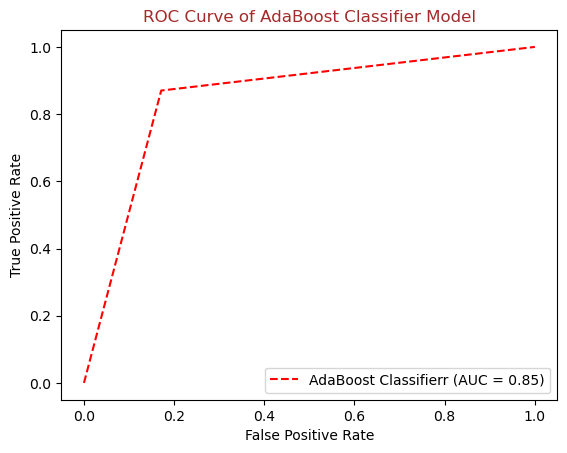

 Here we can area under the curve is --> 0.8494229071781645


In [51]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testABC)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="AdaBoost Classifierr") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of AdaBoost Classifier Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### RandomForestClassifier

In [52]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.9999712304726833


In [53]:
y_pred_testRFC  = rfc.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testRFC ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.9056701475791835


In [54]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testRFC))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      5848
           1       0.89      0.92      0.91      5739

    accuracy                           0.91     11587
   macro avg       0.91      0.91      0.91     11587
weighted avg       0.91      0.91      0.91     11587



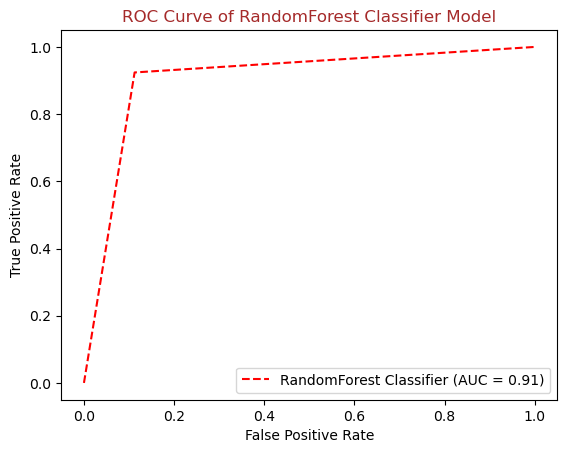

 Here we can area under the curve is --> 0.9058412375879247


In [55]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testRFC)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="RandomForest Classifier") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of RandomForest Classifier Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### LogisticRegression 

In [56]:
log_R =LogisticRegression()
log_R.fit(X_train, Y_train)
y_pred = log_R.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.763600794038954


In [57]:
y_pred_testLR  = log_R.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testLR ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.7654267713817209


In [58]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testLR))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.78      0.75      0.76      5848
           1       0.75      0.78      0.77      5739

    accuracy                           0.77     11587
   macro avg       0.77      0.77      0.77     11587
weighted avg       0.77      0.77      0.77     11587



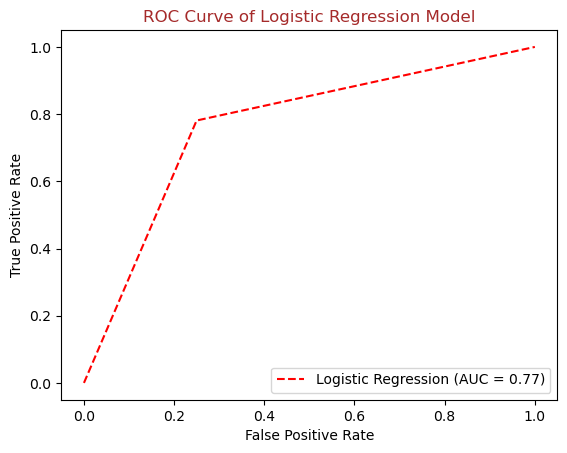

 Here we can area under the curve is --> 0.7655716467284468


In [59]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testLR)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="Logistic Regression") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of Logistic Regression Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### SVC

In [60]:
SVM = SVC()
SVM.fit(X_train, Y_train)
y_pred = SVM.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.8424005293593027


In [61]:
y_pred_testSVM  = SVM.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testSVM ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.8351600932079054


In [62]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testSVM))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.89      0.77      0.82      5848
           1       0.79      0.90      0.84      5739

    accuracy                           0.84     11587
   macro avg       0.84      0.84      0.83     11587
weighted avg       0.84      0.84      0.83     11587



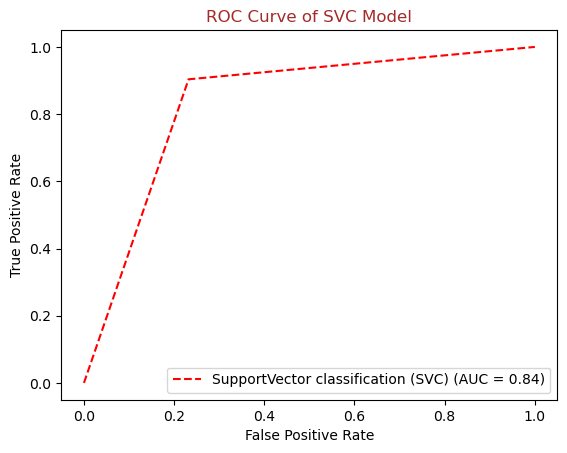

 Here we can area under the curve is --> 0.8357983028974242


In [63]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testSVM)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="SupportVector classification (SVC)") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of SVC Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### GradientBoostingClassifier 

In [64]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, Y_train)
y_pred = GBC.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.8701055841652522


In [65]:
y_pred_testGBC  = GBC.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testGBC ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.8691637179597825


In [66]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testGBC))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.89      0.84      0.87      5848
           1       0.85      0.90      0.87      5739

    accuracy                           0.87     11587
   macro avg       0.87      0.87      0.87     11587
weighted avg       0.87      0.87      0.87     11587



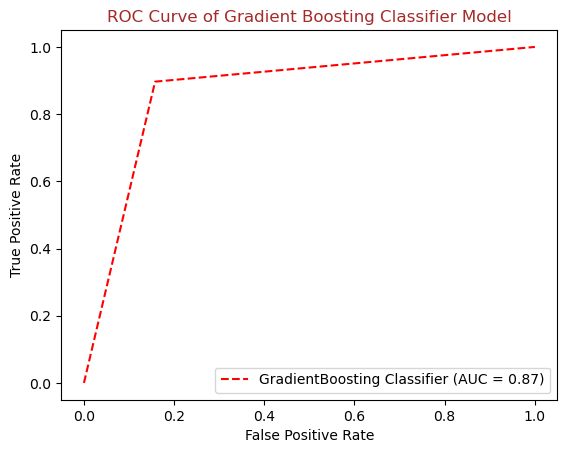

 Here we can area under the curve is --> 0.8694200783560484


In [67]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testGBC)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="GradientBoosting Classifier") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of Gradient Boosting Classifier Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### KNN

In [68]:
KNN =KNeighborsClassifier()
KNN.fit(X_train, Y_train)
y_pred = KNN.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.8968612445697517


In [69]:
y_pred_testKNN  = KNN.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testKNN ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.8446534909812721


In [70]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testKNN))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.92      0.75      0.83      5848
           1       0.79      0.94      0.86      5739

    accuracy                           0.84     11587
   macro avg       0.86      0.85      0.84     11587
weighted avg       0.86      0.84      0.84     11587



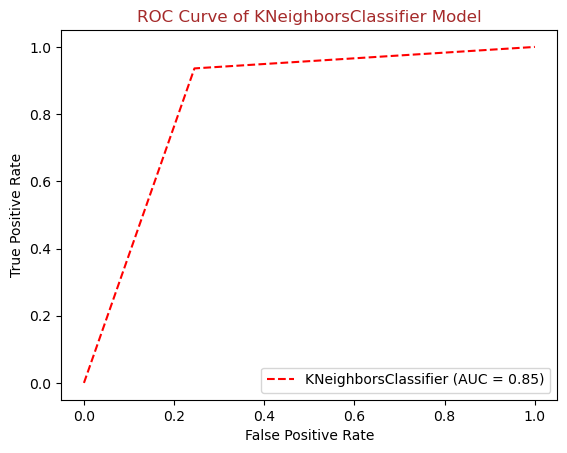

 Here we can area under the curve is --> 0.845505268629048


In [71]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testKNN)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="KNeighborsClassifier") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of KNeighborsClassifier Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

we will further check that which model to use by using the cross validation 

## Cross Validation

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
cscore1 = cross_val_score(rfc,X,Y)
print('Cscore for RandomForest Classifier-> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testRFC)-cscore1.mean())

Cscore for RandomForest Classifier->  [0.82912621 0.88758226 0.92890279 0.93386557 0.93008955]
mean of cscore->  0.9019132781052198
difference between accuracy and cross validation score is 0.0037568694739636976


In [74]:
cscore2 = cross_val_score(KNN,X,Y)
print('Cscore for Kneighbours Classifier ',cscore2)
print('mean of cscore-> ',cscore2.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testKNN)-cscore2.mean())

Cscore for Kneighbours Classifier  [0.84412082 0.8457223  0.86535764 0.8633078  0.8705362 ]
mean of cscore->  0.8578089519728158
difference between accuracy and cross validation score is -0.013155460991543744


In [75]:
cscore3 = cross_val_score(abc,X,Y)
print('Cscore for AdaBoost Classifier-> ',cscore3)
print('mean of cscore-> ',cscore3.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testABC)-cscore3.mean())

Cscore for AdaBoost Classifier->  [0.80647249 0.8473406  0.86115007 0.86945733 0.85974755]
mean of cscore->  0.848833607239359
difference between accuracy and cross validation score is 0.0003939753963534409


In [76]:
cscore4 = cross_val_score(GBC,X,Y)
print('Cscore for Gradient Boost Classifier -> ',cscore4)
print('mean of cscore-> ',cscore4.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testGBC)-cscore4.mean())

Cscore for Gradient Boost Classifier ->  [0.81197411 0.859316   0.87981444 0.88639551 0.87841191]
mean of cscore->  0.8631823934812809
difference between accuracy and cross validation score is 0.005981324478501637


In [77]:
cscore5 = cross_val_score(SVM,X,Y)
print('Cscore for SUpport Vector Machine-> ',cscore5)
print('mean of cscore-> ',cscore5.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testSVM)-cscore5.mean())

Cscore for SUpport Vector Machine->  [0.82632147 0.82727371 0.83633617 0.83957277 0.84140684]
mean of cscore->  0.834182191790547
difference between accuracy and cross validation score is 0.0009779014173584288


In [78]:
cscore6 = cross_val_score(log_R,X,Y)
print('Cscore for Logistic Regression',cscore6)
print('mean of cscore-> ',cscore6.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testLR)-cscore6.mean())

Cscore for Logistic Regression [0.75641855 0.76437588 0.76545474 0.76513108 0.76944654]
mean of cscore->  0.7641653594011334
difference between accuracy and cross validation score is 0.0012614119805874902


here based on cross validation score we choose RandomForestClassifier

## Hyper parameter tuning

In [79]:
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [80]:
parameters = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 50, 100],
}


In [81]:
GSC = GridSearchCV(RandomForestClassifier(),parameters,cv= 5)

In [82]:
GSC.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'max_leaf_nodes': [None, 50, 100],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]})

In [83]:
GSC.best_params_

{'max_depth': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [84]:
rfc_final =RandomForestClassifier(max_depth= None,max_leaf_nodes= None,min_samples_leaf= 1,min_samples_split= 2,n_estimators= 500)
rfc_final.fit(X_train, Y_train)
y_pred = rfc_final.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred )  
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 1.0


In [85]:
y_pred_testrfc  = rfc_final.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testrfc )  
print('accuracy score of test data-->',accuracy)

accuracy score of test data--> 0.9067057909726417


here we can see that after hyperparameter tuning our values increases slightly

## Model Saving

In [86]:
import joblib
joblib.dump(rfc_final, 'Census Income Prediction')

['Census Income Prediction']

# Prediction 

In [87]:
mymodel = joblib.load('Census Income Prediction')
prdt = mymodel.predict(X_test)
prdt

array([0, 0, 1, ..., 0, 1, 0])

## comparing from original 

In [88]:
Orginal = np.array(Y_test)
data1 = pd.DataFrame({'predicted': prdt,'original':Orginal})
data1

,predicted,original
0,0,0
1,0,0
2,1,0
3,1,1
4,1,1
...,...,...
11582,1,1
11583,1,1
11584,0,0
11585,1,1


hence we can see that our model almost all of the values  